In [1]:
import pickle
import train
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#pd.set_option('display.max_columns',7000)

In [2]:
d1 = pickle.load(open('../python objects/patientdata_20170823.pkl', 'rb'))
d1mom = pickle.load(open('../python objects/patient_mother_data_20170724.pkl', 'rb'))
lat_lon_dic = pickle.load(open('../python objects/lat_lon_data_20170920.pkl', 'rb'))
env_dic= pickle.load(open('../python objects/census_data_20170920.pkl', 'rb'))
d1mom_hist = pickle.load(open('../../data/full_lutheran_mother_data.pkl', 'rb'))

In [48]:
child_mrn = set([d1[k]['mrn'] for k in d1.keys()]) & set(d1mom.keys())
mom_mrn = set(d1mom_hist.keys()) & set([d1mom[k]['mom_mrn'] for k in d1mom.keys()])
keys = [k for k in d1.keys() if d1[k]['mrn'] in child_mrn]
mother_child_dic = {}
for k in keys:
    try:
        mother_child_dic[d1mom[d1[k]['mrn']]['mom_mrn']][d1[k]['mrn']] = d1[k]['bdate']
    except:
        mother_child_dic[d1mom[d1[k]['mrn']]['mom_mrn']] = {d1[k]['mrn']: d1[k]['bdate']}

In [68]:
(model_girls, xtrain_girls, ytrain_girls, xtest_girls, ytest_girls, ytestlabel_girls, ytrainlabel_girls, 
 auc_test, r2test, feature_headers, centroids, hnew, standardDevCentroids, cnt_clusters, distances, muxnew, 
 stdxnew, mrnstrain_girls, mrnstest_girls, mrngirls) = \
    train.train_regression_model_for_bmi(d1, d1mom, {}, lat_lon_dic, env_dic, 4.5, 5.5,  0, 24, 
                                         filterSTR=['Gender:1', 
                                                    'Vital: Wt-avg0to1', 
                                                    'Vital: Wt-avg1to3',
                                                    'Vital: BMI-avg10to13',
                                                    'Vital: BMI-avg19to24' ,
                                                    'Vital: BMI-avg0to1', 
                                                    'Vital: BMI-avg1to3', 
                                                    'Vital: Wt-avg10to13',
                                                    'Vital: Wt-avg19to24'], 
                                         variablesubset=[], num_clusters=16, num_iters=100, dist_type='euclidean', 
                                         modelType='lasso', return_data_for_error_analysis=True, add_time=False, 
                                         do_impute=False, do_normalize=False)

8040 features are binary
x shape: (52945, 18823) num features: 18823
1050 patients selected..


/Users/hammor01/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/hammor01/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


18471
corr matrix is filtered to size (18823, 18471)
output is: average:16.477  min: 11.2275  max: 35.0625
normalizing output.
Predicting BMI at age:4.5 to 5.5years, from data in ages:0-24 months
filtering patients with:  ['Gender:1', 'Vital: Wt-avg0to1', 'Vital: Wt-avg1to3', 'Vital: BMI-avg10to13', 'Vital: BMI-avg19to24', 'Vital: BMI-avg0to1', 'Vital: BMI-avg1to3', 'Vital: Wt-avg10to13', 'Vital: Wt-avg19to24']
total size 1050


/Users/hammor01/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


CV R^2 for alpha: 0.001 is: -2052160.80971
CV R^2 for alpha: 0.005 is: -2326575.84885
CV R^2 for alpha: 0.01 is: -1596025.92503
CV R^2 for alpha: 0.1 is: 0.238284694594
best alpha via CV: 0.1
AUC train: 0.852 Explained Variance Score Train: 0.438
AUC test: 0.786 Explained Variance Score Test: 0.238
CV R^2 for alpha: 0.001 is: 0.0489525922043
CV R^2 for alpha: 0.005 is: 0.142717088829
CV R^2 for alpha: 0.01 is: 0.0381257824246
CV R^2 for alpha: 0.1 is: 0.130472574055
best alpha via CV: 0.005
AUC train: 0.897 Explained Variance Score Train: 0.562
AUC test: 0.801 Explained Variance Score Test: 0.143
CV R^2 for alpha: 0.001 is: -0.880820741021
CV R^2 for alpha: 0.005 is: -0.01260372225
CV R^2 for alpha: 0.01 is: -0.00134620262901
CV R^2 for alpha: 0.1 is: 0.274145040374
best alpha via CV: 0.1
AUC train: 0.867 Explained Variance Score Train: 0.465
AUC test: 0.746 Explained Variance Score Test: 0.274
CV R^2 for alpha: 0.001 is: -0.234439980102
CV R^2 for alpha: 0.005 is: 0.0947358777198
CV R

In [98]:
(model_girls, xtrain_lutheran_girls, ytrain_lutheran_girls, xtest_lutheran_girls, ytest_lutheran_girls, ytestlabel_lutheran_girls, ytrainlabel_lutheran_girls, 
 auc_test, r2test, feature_headers, centroids, hnew, standardDevCentroids, cnt_clusters, distances, muxnew, 
 stdxnew, mrnstrain_girls, mrnstest_girls, mrngirls) = \
    train.train_regression_model_for_bmi(d1, d1mom, d1mom_hist, lat_lon_dic, env_dic, 4.5, 5.5,  0, 24, 
                                         filterSTR=['Gender:1', 
                                                    'Vital: Wt-avg0to1', 
                                                    'Vital: Wt-avg1to3',
                                                    'Vital: BMI-avg10to13',
                                                    'Vital: BMI-avg19to24' ,
                                                    'Vital: BMI-avg0to1', 
                                                    'Vital: BMI-avg1to3', 
                                                    'Vital: Wt-avg10to13',
                                                    'Vital: Wt-avg19to24'], 
                                         variablesubset=[], num_clusters=16, num_iters=100, dist_type='euclidean', 
                                         modelType='lasso', return_data_for_error_analysis=True, add_time=False, 
                                         do_impute=False, do_normalize=False)

8040 features are binary
x shape: (52945, 18823) num features: 18823
1050 patients selected..


/Users/hammor01/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/hammor01/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


18471
corr matrix is filtered to size (18823, 18471)
output is: average:16.477  min: 11.2275  max: 35.0625
normalizing output.
Predicting BMI at age:4.5 to 5.5years, from data in ages:0-24 months
filtering patients with:  ['Gender:1', 'Vital: Wt-avg0to1', 'Vital: Wt-avg1to3', 'Vital: BMI-avg10to13', 'Vital: BMI-avg19to24', 'Vital: BMI-avg0to1', 'Vital: BMI-avg1to3', 'Vital: Wt-avg10to13', 'Vital: Wt-avg19to24']
total size 1050


/Users/hammor01/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


CV R^2 for alpha: 0.001 is: -20.9567438894
CV R^2 for alpha: 0.005 is: -2.98328630655
CV R^2 for alpha: 0.01 is: -0.833224112054
CV R^2 for alpha: 0.1 is: 0.0473265363935
best alpha via CV: 0.1
AUC train: 0.903 Explained Variance Score Train: 0.582
AUC test: 0.783 Explained Variance Score Test: 0.047
CV R^2 for alpha: 0.001 is: -442.351805914
CV R^2 for alpha: 0.005 is: -2.78917403414
CV R^2 for alpha: 0.01 is: -1.57423696217
CV R^2 for alpha: 0.1 is: -0.96081726444
best alpha via CV: 0.1
AUC train: 0.880 Explained Variance Score Train: 0.578
AUC test: 0.787 Explained Variance Score Test: -0.961
CV R^2 for alpha: 0.001 is: -4493.27955363
CV R^2 for alpha: 0.005 is: -58.299084735
CV R^2 for alpha: 0.01 is: -9930.80835834
CV R^2 for alpha: 0.1 is: -0.170336413721
best alpha via CV: 0.1
AUC train: 0.898 Explained Variance Score Train: 0.584
AUC test: 0.744 Explained Variance Score Test: -0.170
CV R^2 for alpha: 0.001 is: -365667.251433
CV R^2 for alpha: 0.005 is: -5.88004337021
CV R^2 for

In [71]:
print('mother-child matches in filtered girls data set: ', len(set(list(mrngirls)) & set([str(key) for k,v in mother_child_dic.items() for key in v.keys()])))

mother-child matches in filtered girls data set:  982


In [72]:
print('mother-child matches in filtered boys data set: ', len(set(list(mrnboys)) & set([str(key) for k,v in mother_child_dic.items() for key in v.keys()])))

mother-child matches in filtered boys data set:  1013


In [69]:
(model_boys, xtrain_boys, ytrain_boys, xtest_boys, ytest_boys, ytestlabel_boys, ytrainlabel_boys, 
 auc_test, r2test, feature_headers, centroids, hnew, standardDevCentroids, cnt_clusters, distances, muxnew, 
 stdxnew, mrnstrain_boys, mrnstest_boys, mrnboys) = \
    train.train_regression_model_for_bmi(d1, d1mom, {}, lat_lon_dic, env_dic, 4.5, 5.5,  0, 24, 
                                         filterSTR=['Gender:0', 
                                                    'Vital: Wt-avg0to1', 
                                                    'Vital: Wt-avg1to3',
                                                    'Vital: BMI-avg10to13',
                                                    'Vital: BMI-avg19to24' ,
                                                    'Vital: BMI-avg0to1', 
                                                    'Vital: BMI-avg1to3', 
                                                    'Vital: Wt-avg10to13',
                                                    'Vital: Wt-avg19to24'], 
                                         variablesubset=[], num_clusters=16, num_iters=100, dist_type='euclidean', 
                                         modelType='lasso', return_data_for_error_analysis=True, add_time=False, 
                                         do_impute=False, do_normalize=False)

8040 features are binary
x shape: (52945, 18823) num features: 18823
1060 patients selected..


/Users/hammor01/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/hammor01/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


18471
corr matrix is filtered to size (18823, 18471)
output is: average:16.927  min: 11.915  max: 38.514
normalizing output.
Predicting BMI at age:4.5 to 5.5years, from data in ages:0-24 months
filtering patients with:  ['Gender:0', 'Vital: Wt-avg0to1', 'Vital: Wt-avg1to3', 'Vital: BMI-avg10to13', 'Vital: BMI-avg19to24', 'Vital: BMI-avg0to1', 'Vital: BMI-avg1to3', 'Vital: Wt-avg10to13', 'Vital: Wt-avg19to24']
total size 1060


/Users/hammor01/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


CV R^2 for alpha: 0.001 is: -1.69995432856
CV R^2 for alpha: 0.005 is: -1.14789592659
CV R^2 for alpha: 0.01 is: -0.764496729203
CV R^2 for alpha: 0.1 is: 0.0771577696324
best alpha via CV: 0.1
AUC train: 0.822 Explained Variance Score Train: 0.452
AUC test: 0.734 Explained Variance Score Test: 0.077
CV R^2 for alpha: 0.001 is: -0.0971434325919
CV R^2 for alpha: 0.005 is: 0.0515917462614
CV R^2 for alpha: 0.01 is: 0.10210982504
CV R^2 for alpha: 0.1 is: 0.163235274497
best alpha via CV: 0.1
AUC train: 0.805 Explained Variance Score Train: 0.424
AUC test: 0.780 Explained Variance Score Test: 0.163
CV R^2 for alpha: 0.001 is: -192870.283995
CV R^2 for alpha: 0.005 is: -1677.00126833
CV R^2 for alpha: 0.01 is: -11659.0973474
CV R^2 for alpha: 0.1 is: 0.276968094527
best alpha via CV: 0.1
AUC train: 0.803 Explained Variance Score Train: 0.356
AUC test: 0.785 Explained Variance Score Test: 0.277
CV R^2 for alpha: 0.001 is: -2.90422010353
CV R^2 for alpha: 0.005 is: -0.724949221412
CV R^2 fo

In [99]:
(model_boys, xtrain_lutheran_boys, ytrain_lutheran_boys, xtest_lutheran_boys, ytest_lutheran_boys, ytestlabel_lutheran_boys, ytrainlabel_lutheran_boys, 
 auc_test, r2test, feature_headers, centroids, hnew, standardDevCentroids, cnt_clusters, distances, muxnew, 
 stdxnew, mrnstrain_boys, mrnstest_boys, mrnboys) = \
    train.train_regression_model_for_bmi(d1, d1mom, {}, lat_lon_dic, env_dic, 4.5, 5.5,  0, 24, 
                                         filterSTR=['Gender:0', 
                                                    'Vital: Wt-avg0to1', 
                                                    'Vital: Wt-avg1to3',
                                                    'Vital: BMI-avg10to13',
                                                    'Vital: BMI-avg19to24' ,
                                                    'Vital: BMI-avg0to1', 
                                                    'Vital: BMI-avg1to3', 
                                                    'Vital: Wt-avg10to13',
                                                    'Vital: Wt-avg19to24'], 
                                         variablesubset=[], num_clusters=16, num_iters=100, dist_type='euclidean', 
                                         modelType='lasso', return_data_for_error_analysis=True, add_time=False, 
                                         do_impute=False, do_normalize=False)

8040 features are binary
x shape: (52945, 18823) num features: 18823
1060 patients selected..


/Users/hammor01/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/hammor01/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


18471
corr matrix is filtered to size (18823, 18471)
output is: average:16.927  min: 11.915  max: 38.514
normalizing output.
Predicting BMI at age:4.5 to 5.5years, from data in ages:0-24 months
filtering patients with:  ['Gender:0', 'Vital: Wt-avg0to1', 'Vital: Wt-avg1to3', 'Vital: BMI-avg10to13', 'Vital: BMI-avg19to24', 'Vital: BMI-avg0to1', 'Vital: BMI-avg1to3', 'Vital: Wt-avg10to13', 'Vital: Wt-avg19to24']
total size 1060


/Users/hammor01/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


CV R^2 for alpha: 0.001 is: -1069157.75991
CV R^2 for alpha: 0.005 is: -82055.1334595
CV R^2 for alpha: 0.01 is: -28422.0419495
CV R^2 for alpha: 0.1 is: 0.0727202622558
best alpha via CV: 0.1
AUC train: 0.816 Explained Variance Score Train: 0.443
AUC test: 0.712 Explained Variance Score Test: 0.073
CV R^2 for alpha: 0.001 is: -0.752690077695
CV R^2 for alpha: 0.005 is: -0.312933844434
CV R^2 for alpha: 0.01 is: -0.179264818525
CV R^2 for alpha: 0.1 is: 0.116261824021
best alpha via CV: 0.1
AUC train: 0.826 Explained Variance Score Train: 0.399
AUC test: 0.753 Explained Variance Score Test: 0.116
CV R^2 for alpha: 0.001 is: 0.0597959352713
CV R^2 for alpha: 0.005 is: 0.0925985684449
CV R^2 for alpha: 0.01 is: 0.163933169243
CV R^2 for alpha: 0.1 is: 0.196715773913
best alpha via CV: 0.1
AUC train: 0.821 Explained Variance Score Train: 0.424
AUC test: 0.766 Explained Variance Score Test: 0.197
CV R^2 for alpha: 0.001 is: -0.355971979256
CV R^2 for alpha: 0.005 is: -0.0900707765021
CV R^

In [70]:
pickle.dump(mrngirls, open('mrngirls.pkl', 'wb'))
pickle.dump(mrnboys, open('mrnboys.pkl', 'wb'))

In [1]:
import pickle
import train
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

d1 = pickle.load(open('../python objects/patientdata_20170823.pkl', 'rb'))
d1mom = pickle.load(open('../python objects/patient_mother_data_20170724.pkl', 'rb'))
lat_lon_dic = pickle.load(open('../python objects/lat_lon_data_20170920.pkl', 'rb'))
env_dic= pickle.load(open('../python objects/census_data_20170920.pkl', 'rb'))
d1mom_hist = pickle.load(open('../../data/full_lutheran_mother_data.pkl', 'rb'))

mrngirls = pickle.load(open('mrngirls.pkl', 'rb'))
mrnboys = pickle.load(open('mrnboys.pkl', 'rb'))

In [73]:
prec_total = []
recall_total = []
spec_total = []
titles_total = []
model_list = []

filter_str = ['Vital: Wt-avg0to1', 'Vital: Wt-avg1to3', 'Vital: BMI-avg10to13', 'Vital: BMI-avg19to24' , 'Vital: BMI-avg0to1', 'Vital: BMI-avg1to3', 'Vital: Wt-avg10to13', 'Vital: Wt-avg19to24']

for modeltype_ix in ['lasso','randomforest']:
    for ix, mrnlist in enumerate([mrnboys, mrngirls]):
        for mother_hist_ix in ['w/o Lutheran', 'w/ Lutheran']:
            
            mother_hist = {} if mother_hist_ix == 'w/o Lutheran' else d1mom_hist
            filterstr_ix = 'Gender:0' if ix == 0 else 'Gender:1'
            gender_clean = 'boys' if ix==0 else 'girls'
            
            titles_total.append(gender_clean + ' ' + mother_hist_ix + '- model: ' + modeltype_ix)
            print(modeltype_ix + '\t' + filterstr_ix + '\t' + mother_hist_ix)
            (model, filterSTR, sig_headers,  centroids, hnew, standardDevCentroids, cnt_clusters, muxnew, 
             stdxnew, mrns, prec_list, recall_list, spec_list) = \
                train.train_regression_model_for_bmi(d1, d1mom, mother_hist, lat_lon_dic, env_dic, 4.5, 5.5,  0, 24, 
                                         filterSTR=[filterstr_ix]+filter_str, variablesubset=[], num_clusters=16, 
                                         num_iters=100, dist_type='euclidean', modelType=modeltype_ix, 
                                         return_data_for_error_analysis=False, return_model=True, add_time=False, 
                                         do_impute=False)
            model_list.append(model)
            prec_total.append(prec_list)
            recall_total.append(recall_list)
            spec_total.append(spec_list)
            

lasso	Gender:0	w/o Lutheran
8040 features are binary
x shape: (52945, 18823) num features: 18823
1060 patients selected..


/Volumes/CPO/ObesityPY/src/train.py:169: RuntimeWarning: Mean of empty slice
  mu = np.nanmean(xcop, axis=0)
/Users/hammor01/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1427: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/hammor01/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/hammor01/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


18471
corr matrix is filtered to size (18823, 18471)
output is: average:16.927  min: 11.915  max: 38.514
normalizing output.
Predicting BMI at age:4.5 to 5.5years, from data in ages:0-24 months
filtering patients with:  ['Gender:0', 'Vital: Wt-avg0to1', 'Vital: Wt-avg1to3', 'Vital: BMI-avg10to13', 'Vital: BMI-avg19to24', 'Vital: BMI-avg0to1', 'Vital: BMI-avg1to3', 'Vital: Wt-avg10to13', 'Vital: Wt-avg19to24']
total size 1060
CV R^2 for alpha: 0.001 is: 0.107174651762
CV R^2 for alpha: 0.005 is: 0.255484343813
CV R^2 for alpha: 0.01 is: 0.296374661951
CV R^2 for alpha: 0.1 is: 0.29183659545
best alpha via CV: 0.01
AUC train: 0.866 Explained Variance Score Train: 0.523
AUC test: 0.783 Explained Variance Score Test: 0.296
CV R^2 for alpha: 0.001 is: -0.0390675339838
CV R^2 for alpha: 0.005 is: 0.204428628813
CV R^2 for alpha: 0.01 is: 0.255242157852
CV R^2 for alpha: 0.1 is: 0.282324580023
best alpha via CV: 0.1
AUC train: 0.797 Explained Variance Score Train: 0.267
AUC test: 0.772 Explai

/Volumes/CPO/ObesityPY/src/train.py:378: RuntimeWarning: invalid value encountered in double_scalars
  ppv = tp / (tp + fp)


total variables (18823,)  and total subjects: 1060
->AUC test: 0.778 [0.763 0.793]
->Explained Variance (R2) test: 0.277 [0.240 0.314]
Test set metrics:
@threshold:2.063, sens:0.000, spec:1.000, ppv: nan, acc:0.774, f1:0.000 total+:0.000
@threshold:0.908, sens:0.069, spec:1.000, ppv:1.000, acc:0.789, f1:0.130 total+:5.000
@threshold:0.902, sens:0.083, spec:1.000, ppv:1.000, acc:0.792, f1:0.154 total+:6.000
@threshold:0.808, sens:0.139, spec:0.996, ppv:0.909, acc:0.802, f1:0.241 total+:11.000
@threshold:0.797, sens:0.153, spec:0.992, ppv:0.846, acc:0.802, f1:0.259 total+:13.000
@threshold:0.769, sens:0.153, spec:0.988, ppv:0.786, acc:0.799, f1:0.256 total+:14.000
@threshold:0.764, sens:0.167, spec:0.988, ppv:0.800, acc:0.802, f1:0.276 total+:15.000
@threshold:0.630, sens:0.250, spec:0.984, ppv:0.818, acc:0.818, f1:0.383 total+:22.000
@threshold:0.526, sens:0.264, spec:0.972, ppv:0.731, acc:0.811, f1:0.388 total+:26.000
@threshold:0.508, sens:0.278, spec:0.967, ppv:0.714, acc:0.811, f1:0

  Newborn Diagnosis:9ccs222:Perint jaund | coef 0.019 [-0.016 0.053] | OR_adj 1.019 [0.984 1.054] | occ: 111 | OR_unadj: 1.292 [0.823 2.027] | indivs AUC:0.544
Correlated most with:
Newborn Diagnosis:9ccs222:Perint jaund:1.000
    Newborn Diagnosis:9ccs219:Low birth wt:0.361
    Maternal Diagnosis:9ccs184:Early labor:0.313
    Diagnosis:9ccs219:Low birth wt:0.292
    Newborn Diagnosis:9ccs256:Exam/eval:0.250
    Newborn Diagnosis:9ccs253:Allergy:0.221
    Maternal Diagnosis:9ccs183:HTN in preg:0.173
    Newborn Diagnosis:9ccs221:Resp distres:0.148
    Diagnosis:9ccs222:Perint jaund:0.142
    Maternal Diagnosis:9ccs58:Ot nutrit dx:0.123

* Vital: BMI-avg7to10 | coef 0.015 [-0.004 0.033] | OR_adj 1.015 [0.996 1.034] | occ: 975 | OR_unadj: 2.144 [1.595 2.881] | indivs AUC:0.625
Correlated most with:
Newborn Diagnosis:9ccs191:Amnios dx:0.124
    Diagnosis:9ccs128:Asthma:0.115
    Diagnosis:9ccs125:Bronchitis:0.099
    Diagnosis:9ccs138:Esophgeal dx:-0.093
    Newborn Diagnosis:9ccs47:Ot bn

  MatDeliveryAge | coef 0.002 [-0.002 0.006] | OR_adj 1.002 [0.998 1.006] | occ: 1013 | OR_unadj: 1.007 [0.751 1.351] | indivs AUC:0.451
Correlated most with:
MatDeliveryAge:1.000
    Maternal Diagnosis:9ccs186:DM in preg:0.238
    Maternal Diagnosis:9ccs176:Contraceptiv:0.227
    Maternal Diagnosis:9ccs189:Prev c-sectn:0.205
    Newborn Diagnosis:9ccs259:Unclassified:0.146
    Maternal Diagnosis:9ccs49:DiabMel no c:0.146
    Maternal Diagnosis:9ccs195:Ot compl bir:0.133
    Maternal Diagnosis:9ccs193:OB-related perin trauma:-0.127
    Maternal Diagnosis:9ccs98:HTN:0.116
    Maternal Diagnosis:9ccs96:Hrt valve dx:0.098

* Vital: Wt for Len Percentile-latest | coef 0.002 [-0.007 0.012] | OR_adj 1.002 [0.993 1.012] | occ: 1060 | OR_unadj: 5.996 [4.141 8.682] | indivs AUC:0.763
Correlated most with:
Maternal Diagnosis:9ccs185:Long pregncy:0.102
    Diagnosis:9ccs128:Asthma:0.080
    Diagnosis:9ccs243:Poisn nonmed:0.079
    Diagnosis:9ccs215:gu cong anom:0.076
    Diagnosis:9ccs2:Septicemi

Vital : 0.568658080758
Maternal Diagnosis : 0.0592774123886
Newborn Diagnosis : 0.00888305809348
Diagnosis : -0.0104057383142
Census : -0.00301690129755
MatDeliveryAge : 0.00215804049398
lasso	Gender:0	w/ Lutheran
8040 features are binary
x shape: (52945, 18823) num features: 18823
1060 patients selected..
18471
corr matrix is filtered to size (18823, 18471)
output is: average:16.927  min: 11.915  max: 38.514
normalizing output.
Predicting BMI at age:4.5 to 5.5years, from data in ages:0-24 months
filtering patients with:  ['Gender:0', 'Vital: Wt-avg0to1', 'Vital: Wt-avg1to3', 'Vital: BMI-avg10to13', 'Vital: BMI-avg19to24', 'Vital: BMI-avg0to1', 'Vital: BMI-avg1to3', 'Vital: Wt-avg10to13', 'Vital: Wt-avg19to24']
total size 1060
CV R^2 for alpha: 0.001 is: 0.0874709609064
CV R^2 for alpha: 0.005 is: 0.181189451805
CV R^2 for alpha: 0.01 is: 0.19320526781
CV R^2 for alpha: 0.1 is: 0.192543801593
best alpha via CV: 0.01
AUC train: 0.836 Explained Variance Score Train: 0.529
AUC test: 0.809

  Maternal Diagnosis:9ccs48:Thyroid dsor | coef 0.057 [-0.049 0.163] | OR_adj 1.059 [0.952 1.177] | occ: 5 | OR_unadj: 0.887 [0.099 7.973] | indivs AUC:0.500
Correlated most with:
Maternal Diagnosis:9ccs48:Thyroid dsor:1.000
    Maternal Diagnosis:9ccs219:Low birth wt-postPregnancy:0.446
    Maternal Diagnosis:9ccs55:Fluid/elc dx-postPregnancy:0.446
    Maternal Diagnosis:9ccs72:Anxiety dx:0.446
    Maternal Lab History: THYROPEROXIDASE AB (TPO)-postPregnancy:0.366
    Maternal Diagnosis:9ccs55:Fluid/elc dx:0.314
    Maternal Diagnosis:9ccs48:Thyroid dsor-otherPregnancy:0.314
    Maternal Lab History: FREE T-4-postPregnancy:0.293
    Diagnosis:9ccs48:Thyroid dsor:0.265
    Maternal Diagnosis:9ccs183:HTN in preg-postPregnancy:0.256

  Newborn Diagnosis:9ccs222:Perint jaund | coef 0.056 [0.011 0.101] | OR_adj 1.057 [1.011 1.106] | occ: 111 | OR_unadj: 1.292 [0.823 2.027] | indivs AUC:0.499
Correlated most with:
Newborn Diagnosis:9ccs222:Perint jaund:1.000
    Newborn Diagnosis:9ccs219:Lo

* Vital: Ht-avg19to24 | coef -0.023 [-0.052 0.005] | OR_adj 0.977 [0.949 1.005] | occ: 1053 | OR_unadj: 1.536 [1.137 2.076] | indivs AUC:0.555
Correlated most with:
Maternal Procedure History:90473-postPregnancy:-0.183
    Maternal Procedure History:90660-postPregnancy:-0.183
    Maternal Diagnosis:9ccs205:Back problem-otherPregnancy:-0.173
    Maternal Diagnosis:9ccs46:Bnign ut neo:-0.160
    Maternal Procedure History:85018-postPregnancy:-0.157
    Maternal Diagnosis:9ccs134:Ot uppr resp-otherPregnancy:-0.155
    Maternal Lab History: APF MoM-postPregnancy:-0.137
    Diagnosis:9ccs55:Fluid/elc dx:-0.134
    Newborn Diagnosis:9ccs218:Liveborn:0.123
    Maternal Diagnosis:9ccs138:Esophgeal dx-otherPregnancy:-0.121

* Diagnosis:9ccs58:Ot nutrit dx | coef 0.022 [-0.012 0.056] | OR_adj 1.023 [0.988 1.058] | occ: 111 | OR_unadj: 1.921 [1.256 2.938] | indivs AUC:0.537
Correlated most with:
Diagnosis:9ccs58:Ot nutrit dx:1.000
    Maternal Procedure History:90658-postPregnancy:0.156
    Diagn

  Maternal Lab History: EOSINOPHIL-otherPregnancy | coef -0.010 [-0.020 0.000] | OR_adj 0.990 [0.980 1.000] | occ: 133 | OR_unadj: 0.975 [0.492 1.931] | indivs AUC:0.487
Correlated most with:
Maternal Lab History: EOSINOPHIL-otherPregnancy:1.000
    Maternal Lab History: NEUTROPHILS-5P-otherPregnancy:-0.385
    Maternal Procedure History:57456-postPregnancy:0.378
    Maternal Diagnosis:9ccs153:GI hemorrhag-otherPregnancy:0.378
    Maternal Diagnosis:9ccs182:Hemorr preg-otherPregnancy:0.378
    Maternal Lab History: EOSINOPHIL-postPregnancy:0.345
    Maternal Diagnosis:9ccs116:Art embolism-postPregnancy:0.274
    Maternal Diagnosis:9ccs118:Phlebitis-postPregnancy:0.274
    Maternal Lab History: INR-postPregnancy:0.261
    Maternal Lab History: PT-postPregnancy:0.256

* Vital: Wt for Len Percentile-avg3to5 | coef -0.010 [-0.027 0.008] | OR_adj 0.991 [0.973 1.008] | occ: 358 | OR_unadj: 1.460 [1.005 2.121] | indivs AUC:0.527
Correlated most with:
Maternal Lab History: ANION GAP-postPregna

  Maternal Procedure History:99000-otherPregnancy | coef -0.007 [-0.020 0.006] | OR_adj 0.993 [0.980 1.006] | occ: 60 | OR_unadj: 0.787 [0.402 1.539] | indivs AUC:0.483
Correlated most with:
Maternal Procedure History:99000-otherPregnancy:1.000
    Maternal Procedure History:99401-otherPregnancy:0.636
    Maternal Diagnosis:9ccs255:Social admin-otherPregnancy:0.634
    Maternal Procedure History:81000-otherPregnancy:0.623
    Maternal Diagnosis:9ccs10:Immuniz/scrn-otherPregnancy:0.615
    Maternal Diagnosis:9ccs196:Nml preg/del-otherPregnancy:0.608
    Maternal Procedure History:86580-otherPregnancy:0.559
    Maternal Procedure History:36415-otherPregnancy:0.460
    Maternal Lab History: HEMOGLOBIN A1-otherPregnancy:0.406
    Maternal Procedure History:99000-postPregnancy:0.391

  Maternal Lab History: URINE PH-otherPregnancy | coef 0.007 [-0.006 0.020] | OR_adj 1.007 [0.994 1.020] | occ: 100 | OR_unadj: 1.192 [0.593 2.397] | indivs AUC:0.508
Correlated most with:
Maternal Lab History:

  Maternal Diagnosis:9ccs196:Nml preg/del-postPregnancy | coef -0.002 [-0.005 0.002] | OR_adj 0.998 [0.995 1.002] | occ: 362 | OR_unadj: 0.916 [0.672 1.247] | indivs AUC:0.453
Correlated most with:
Maternal Diagnosis:9ccs196:Nml preg/del-postPregnancy:1.000
    Maternal Diagnosis:9ccs257:Ot aftercare-postPregnancy:0.679
    Maternal Diagnosis:9ccs176:Contraceptiv-postPregnancy:0.657
    Maternal Procedure History:81000-postPregnancy:0.643
    Maternal Procedure History:99000-postPregnancy:0.642
    Maternal Lab History: CREATININE-postPregnancy:-0.592
    Maternal Diagnosis:9ccs256:Exam/eval-postPregnancy:0.582
    Maternal Diagnosis:9ccs196:Nml preg/del-otherPregnancy:0.525
    Maternal Procedure History:81000-otherPregnancy:0.523
    Maternal Procedure History:81025-postPregnancy:0.486

  Lab:295669 BILIRUBIN DIRECT - LMC | coef 0.002 [-0.002 0.005] | OR_adj 1.002 [0.998 1.005] | occ: 85 | OR_unadj: 1.114 [0.539 2.301] | indivs AUC:0.518
Correlated most with:
Lab:295669 BILIRUBIN DIR

Vital : 0.654078546445
Maternal Diagnosis : 0.190714529512
Newborn Diagnosis : 0.0465486248178
Diagnosis : 0.0432726894356
Maternal Lab History : 0.0616049988028
Maternal Procedure History : -0.0359603823787
Census : -0.00454475788433
MatDeliveryAge : 0.00836435635541
Lab : 0.00183227297254
lasso	Gender:1	w/o Lutheran
8040 features are binary
x shape: (52945, 18823) num features: 18823
1050 patients selected..
18471
corr matrix is filtered to size (18823, 18471)
output is: average:16.477  min: 11.2275  max: 35.0625
normalizing output.
Predicting BMI at age:4.5 to 5.5years, from data in ages:0-24 months
filtering patients with:  ['Gender:1', 'Vital: Wt-avg0to1', 'Vital: Wt-avg1to3', 'Vital: BMI-avg10to13', 'Vital: BMI-avg19to24', 'Vital: BMI-avg0to1', 'Vital: BMI-avg1to3', 'Vital: Wt-avg10to13', 'Vital: Wt-avg19to24']
total size 1050
CV R^2 for alpha: 0.001 is: 0.0899237122619
CV R^2 for alpha: 0.005 is: 0.29733222216
CV R^2 for alpha: 0.01 is: 0.347950892887
CV R^2 for alpha: 0.1 is: 0

  Maternal Diagnosis:9ccs191:Amnios dx | coef 0.010 [-0.008 0.027] | OR_adj 1.010 [0.992 1.028] | occ: 107 | OR_unadj: 1.451 [0.862 2.441] | indivs AUC:0.498
Correlated most with:
Maternal Diagnosis:9ccs191:Amnios dx:1.000
    Newborn Diagnosis:9ccs256:Exam/eval:0.196
    Maternal Diagnosis:9ccs184:Early labor:0.135
    Newborn Diagnosis:9ccs219:Low birth wt:0.133
    Maternal Diagnosis:9ccs244:Other injury:0.130
    Maternal Diagnosis:9ccs195:Ot compl bir:0.117
    Diagnosis:9ccs211:Ot conn tiss:0.101
    Diagnosis:9ccs208:Acq foot def:0.097
    Maternal Diagnosis:9ccs73:Preadult dx:0.092
    Newborn Diagnosis:9ccs55:Fluid/elc dx:0.092

* Vital: Ht Percentile-latest | coef 0.009 [-0.008 0.025] | OR_adj 1.009 [0.993 1.025] | occ: 841 | OR_unadj: 1.512 [1.068 2.142] | indivs AUC:0.514
Correlated most with:
Newborn Diagnosis:9ccs219:Low birth wt:-0.111
    Diagnosis:9ccs89:Blindness:0.102
    Maternal Diagnosis:9ccs168:PID:-0.082
    Maternal Diagnosis:9ccs184:Early labor:-0.079
    Diag

  MatDeliveryAge | coef 0.004 [-0.004 0.013] | OR_adj 1.004 [0.996 1.013] | occ: 982 | OR_unadj: 1.125 [0.795 1.591] | indivs AUC:0.434
Correlated most with:
MatDeliveryAge:1.000
    Maternal Diagnosis:9ccs176:Contraceptiv:0.253
    Maternal Diagnosis:9ccs186:DM in preg:0.169
    Maternal Diagnosis:9ccs189:Prev c-sectn:0.169
    Maternal Diagnosis:9ccs195:Ot compl bir:0.129
    Maternal Diagnosis:9ccs49:DiabMel no c:0.127
    Maternal Diagnosis:9ccs98:HTN:0.117
    Newborn Diagnosis:9ccs259:Unclassified:0.114
    Maternal Diagnosis:9ccs193:OB-related perin trauma:-0.107
    Diagnosis:9ccs258:Other screen:0.088

  Diagnosis:9ccs253:Allergy | coef -0.004 [-0.012 0.004] | OR_adj 0.996 [0.988 1.004] | occ: 606 | OR_unadj: 0.909 [0.641 1.289] | indivs AUC:0.502
Correlated most with:
Diagnosis:9ccs253:Allergy:1.000
    Diagnosis:9ccs200:Oth skin dx:0.151
    Diagnosis:9ccs4:Mycoses:0.144
    Diagnosis:9ccs239:Superfic inj:0.125
    Diagnosis:9ccs198:Ot infl skin:0.097
    Diagnosis:9ccs257:O


Vital : 0.642410206182
Maternal Diagnosis : 0.0166973277143
Diagnosis : -0.0151703390023
Newborn Diagnosis : 0.0042376960952
Census : -0.000294031376363
MatDeliveryAge : 0.00446609069424
lasso	Gender:1	w/ Lutheran
8040 features are binary
x shape: (52945, 18823) num features: 18823
1050 patients selected..
18471
corr matrix is filtered to size (18823, 18471)
output is: average:16.477  min: 11.2275  max: 35.0625
normalizing output.
Predicting BMI at age:4.5 to 5.5years, from data in ages:0-24 months
filtering patients with:  ['Gender:1', 'Vital: Wt-avg0to1', 'Vital: Wt-avg1to3', 'Vital: BMI-avg10to13', 'Vital: BMI-avg19to24', 'Vital: BMI-avg0to1', 'Vital: BMI-avg1to3', 'Vital: Wt-avg10to13', 'Vital: Wt-avg19to24']
total size 1050
CV R^2 for alpha: 0.001 is: 0.0289466978611
CV R^2 for alpha: 0.005 is: 0.288817381623
CV R^2 for alpha: 0.01 is: 0.352516972275
CV R^2 for alpha: 0.1 is: 0.338860843696
best alpha via CV: 0.01
AUC train: 0.887 Explained Variance Score Train: 0.519
AUC test: 0

/Users/hammor01/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


CV R^2 for alpha: 0.001 is: -0.0562129925261
CV R^2 for alpha: 0.005 is: 0.29688416616
CV R^2 for alpha: 0.01 is: 0.350320154154
CV R^2 for alpha: 0.1 is: 0.385670209249
best alpha via CV: 0.1
AUC train: 0.835 Explained Variance Score Train: 0.375
AUC test: 0.798 Explained Variance Score Test: 0.386
CV R^2 for alpha: 0.001 is: -0.0610614968199
CV R^2 for alpha: 0.005 is: 0.34018426648
CV R^2 for alpha: 0.01 is: 0.431837657575
CV R^2 for alpha: 0.1 is: 0.391820780984
best alpha via CV: 0.01
AUC train: 0.858 Explained Variance Score Train: 0.523
AUC test: 0.860 Explained Variance Score Test: 0.432
CV R^2 for alpha: 0.001 is: 0.0257943564148
CV R^2 for alpha: 0.005 is: 0.30147547607
CV R^2 for alpha: 0.01 is: 0.337269369125
CV R^2 for alpha: 0.1 is: 0.35646366846
best alpha via CV: 0.1
AUC train: 0.845 Explained Variance Score Train: 0.362
AUC test: 0.821 Explained Variance Score Test: 0.356
CV R^2 for alpha: 0.001 is: -0.137798624228
CV R^2 for alpha: 0.005 is: 0.261065042905
CV R^2 for 

* Diagnosis:9ccs58:Ot nutrit dx | coef 0.070 [0.025 0.114] | OR_adj 1.072 [1.026 1.121] | occ: 111 | OR_unadj: 2.029 [1.258 3.274] | indivs AUC:0.539
Correlated most with:
Diagnosis:9ccs58:Ot nutrit dx:1.000
    Maternal Diagnosis:9ccs134:Ot uppr resp-postPregnancy:0.130
    Maternal Diagnosis:9ccs170:Prolapse-postPregnancy:0.127
    Maternal Diagnosis:9ccs136:Teeth dx-otherPregnancy:0.127
    Diagnosis:9ccs256:Exam/eval:0.105
    Diagnosis:9ccs83:Epilepsy/cnv:0.102
    Diagnosis:9ccs134:Ot uppr resp:0.098
    Maternal Lab History: TP PERIOD-postPregnancy:0.096
    Maternal Diagnosis:9ccs6:Hepatitis:0.090
    Diagnosis:9ccs132:Lung externl:0.090

* Vital: BMI-latest | coef 0.069 [0.020 0.119] | OR_adj 1.072 [1.020 1.126] | occ: 1045 | OR_unadj: 7.919 [5.048 12.421] | indivs AUC:0.764
Correlated most with:
Maternal Lab History: 2 HOUR-postPregnancy:0.134
    Maternal Diagnosis:9ccs58:Ot nutrit dx:0.127
    Maternal Diagnosis:9ccs181:Ot preg comp-postPregnancy:0.114
    Maternal Lab Hist

  Maternal Lab History: WEIGHT-postPregnancy | coef 0.018 [-0.003 0.040] | OR_adj 1.019 [0.997 1.041] | occ: 75 | OR_unadj: 2.267 [0.990 5.191] | indivs AUC:0.528
Correlated most with:
Maternal Lab History: WEIGHT-postPregnancy:1.000
    Maternal Diagnosis:10ccs26:Cervix cancr-postPregnancy:0.376
    Maternal Lab History: BETA HCG FREE-postPregnancy:-0.299
    Maternal Diagnosis:9ccs191:Amnios dx-postPregnancy:0.266
    Maternal Diagnosis:10ccs9:Sexual Infxs-postPregnancy:0.266
    Maternal Lab History: CREATININE PERIOD-postPregnancy:-0.259
    Maternal Diagnosis:9ccs98:HTN-otherPregnancy:-0.245
    Maternal Lab History: TP PERIOD-postPregnancy:-0.224
    Maternal Diagnosis:9ccs143:Abdom hernia-postPregnancy:-0.196
    Maternal Procedure History:J2790-postPregnancy:0.191

  Vital: Temp-latest | coef 0.018 [0.003 0.034] | OR_adj 1.018 [1.003 1.034] | occ: 1049 | OR_unadj: 1.210 [0.854 1.714] | indivs AUC:0.462
Correlated most with:
Diagnosis:9ccs70:Schizo/rl dx:0.134
    Maternal Diagn

  Maternal Procedure History:90656-otherPregnancy | coef 0.013 [-0.011 0.037] | OR_adj 1.013 [0.989 1.038] | occ: 51 | OR_unadj: 1.716 [0.860 3.424] | indivs AUC:0.531
Correlated most with:
Maternal Procedure History:90656-otherPregnancy:1.000
    Maternal Procedure History:90471-otherPregnancy:0.657
    Maternal Procedure History:90715-otherPregnancy:0.594
    Maternal Procedure History:81000-otherPregnancy:0.495
    Maternal Diagnosis:9ccs196:Nml preg/del-otherPregnancy:0.495
    Maternal Diagnosis:9ccs10:Immuniz/scrn-otherPregnancy:0.487
    Maternal Diagnosis:9ccs255:Social admin-otherPregnancy:0.477
    Maternal Procedure History:99401-otherPregnancy:0.462
    Maternal Procedure History:86580-otherPregnancy:0.431
    Maternal Procedure History:S9470-otherPregnancy:0.343

* Maternal Diagnosis:9ccs58:Ot nutrit dx-postPregnancy | coef 0.013 [-0.011 0.037] | OR_adj 1.013 [0.989 1.038] | occ: 40 | OR_unadj: 3.922 [2.016 7.630] | indivs AUC:0.508
Correlated most with:
Maternal Diagnosis

  Lab:295669 BILIRUBIN DIRECT - LMC | coef 0.008 [-0.007 0.024] | OR_adj 1.008 [0.993 1.024] | occ: 92 | OR_unadj: 1.325 [0.605 2.904] | indivs AUC:0.516
Correlated most with:
Lab:295669 BILIRUBIN DIRECT - LMC:1.000
    Maternal Diagnosis:9ccs200:Oth skin dx:-0.295
    Lab:294203 BILIRUBIN TOTAL - LMC:0.253
    Maternal Lab History: HEMATOCRIT-otherPregnancy:-0.140
    Maternal Lab History: HEMOGLOBIN-otherPregnancy:-0.136
    Maternal Procedure History:J7302-postPregnancy:0.130
    Maternal Lab History: URINE CULTURE-postPregnancy:0.125
    Maternal Lab History: URINE CULTURE-otherPregnancy:0.122
    Diagnosis:9ccs224:Ot perint dx:-0.117
    Newborn Diagnosis:9ccs214:GI cong anom:0.111

  Maternal Lab History: GLUCOSE CHALLENGE-postPregnancy | coef 0.008 [-0.007 0.023] | OR_adj 1.008 [0.993 1.023] | occ: 159 | OR_unadj: 0.827 [0.403 1.698] | indivs AUC:0.493
Correlated most with:
Maternal Lab History: GLUCOSE CHALLENGE-postPregnancy:1.000
    Maternal Diagnosis:9ccs186:DM in preg-post

  Maternal Diagnosis:9ccs255:Social admin-otherPregnancy | coef 0.006 [-0.002 0.014] | OR_adj 1.006 [0.998 1.014] | occ: 144 | OR_unadj: 1.566 [0.994 2.468] | indivs AUC:0.511
Correlated most with:
Maternal Diagnosis:9ccs255:Social admin-otherPregnancy:1.000
    Maternal Procedure History:99401-otherPregnancy:0.934
    Maternal Diagnosis:9ccs10:Immuniz/scrn-otherPregnancy:0.916
    Maternal Procedure History:81000-otherPregnancy:0.874
    Maternal Diagnosis:9ccs196:Nml preg/del-otherPregnancy:0.866
    Maternal Procedure History:86580-otherPregnancy:0.769
    Maternal Procedure History:86703-otherPregnancy:0.548
    Maternal Procedure History:90471-otherPregnancy:0.528
    Maternal Procedure History:36415-otherPregnancy:0.517
    Maternal Diagnosis:9ccs195:Ot compl bir-otherPregnancy:0.515

  Vital: HR-avg10to13 | coef -0.006 [-0.017 0.005] | OR_adj 0.994 [0.983 1.005] | occ: 282 | OR_unadj: 0.858 [0.484 1.519] | indivs AUC:0.508
Correlated most with:
Diagnosis:9ccs106:Dysrhythmia:0.17

  Diagnosis:9ccs124:Tonsillitis | coef -0.002 [-0.005 0.002] | OR_adj 0.998 [0.995 1.002] | occ: 21 | OR_unadj: 0.298 [0.040 2.235] | indivs AUC:0.492
Correlated most with:
Diagnosis:9ccs124:Tonsillitis:1.000
    Lab:294495 LEAD, BLOOD - LMC:-0.156
    Maternal Diagnosis:9ccs255:Social admin:0.150
    Maternal Diagnosis:9ccs183:HTN in preg-otherPregnancy:0.150
    Maternal Diagnosis:9ccs204:Ot joint dx:0.150
    Maternal Diagnosis:9ccs117:Ot circul dx:0.150
    Maternal Diagnosis:9ccs96:Hrt valve dx:0.150
    Maternal Diagnosis:9ccs215:gu cong anom:0.120
    Maternal Diagnosis:9ccs124:Tonsillitis-postPregnancy:0.120
    Maternal Procedure History:81002-otherPregnancy:0.120

  Maternal Lab History: MONOCYTES-5P-postPregnancy | coef -0.002 [-0.004 0.001] | OR_adj 0.998 [0.996 1.001] | occ: 290 | OR_unadj: 1.092 [0.655 1.820] | indivs AUC:0.472
Correlated most with:
Maternal Lab History: MONOCYTES-5P-postPregnancy:1.000
    Maternal Lab History: ABS MONOCYTES-postPregnancy:0.601
    Mater

Vital : 0.537132591783
Diagnosis : 0.0323261284638
Maternal Lab History : 0.0490621429655
Maternal Diagnosis : 0.0925045091418
Census : 0.00800034455842
Maternal Procedure History : 0.0137093562578
Newborn Diagnosis : 0.00227126446103
MatDeliveryAge : 0.0119228537965
Lab : 0.00846083195497
randomforest	Gender:0	w/o Lutheran
8040 features are binary
x shape: (52945, 18823) num features: 18823
1060 patients selected..
18471
corr matrix is filtered to size (18823, 18471)
output is: average:16.927  min: 11.915  max: 38.514
normalizing output.
Predicting BMI at age:4.5 to 5.5years, from data in ages:0-24 months
filtering patients with:  ['Gender:0', 'Vital: Wt-avg0to1', 'Vital: Wt-avg1to3', 'Vital: BMI-avg10to13', 'Vital: BMI-avg19to24', 'Vital: BMI-avg0to1', 'Vital: BMI-avg1to3', 'Vital: Wt-avg10to13', 'Vital: Wt-avg19to24']
total size 1060
CV R^2 for alpha: (2000, 2) is: 0.333355533274
CV R^2 for alpha: (2000, 4) is: 0.336575340745
CV R^2 for alpha: (2000, 10) is: 0.336179833821
best alph

/Volumes/CPO/ObesityPY/src/train.py:378: RuntimeWarning: invalid value encountered in double_scalars
  ppv = tp / (tp + fp)


total variables (18823,)  and total subjects: 1060
->AUC test: 0.770 [0.751 0.790]
->Explained Variance (R2) test: 0.228 [0.179 0.276]
Test set metrics:
@threshold:5.434, sens:0.000, spec:1.000, ppv: nan, acc:0.783, f1:0.000 total+:0.000
@threshold:4.434, sens:0.000, spec:1.000, ppv: nan, acc:0.783, f1:0.000 total+:0.000
@threshold:2.120, sens:0.000, spec:0.996, ppv:0.000, acc:0.780, f1:0.000 total+:1.000
@threshold:1.663, sens:0.014, spec:0.992, ppv:0.333, acc:0.780, f1:0.028 total+:3.000
@threshold:1.560, sens:0.014, spec:0.988, ppv:0.250, acc:0.777, f1:0.027 total+:4.000
@threshold:1.513, sens:0.029, spec:0.988, ppv:0.400, acc:0.780, f1:0.054 total+:5.000
@threshold:1.291, sens:0.072, spec:0.984, ppv:0.556, acc:0.786, f1:0.128 total+:9.000
@threshold:1.278, sens:0.087, spec:0.984, ppv:0.600, acc:0.789, f1:0.152 total+:10.000
@threshold:1.267, sens:0.101, spec:0.980, ppv:0.583, acc:0.789, f1:0.173 total+:12.000
@threshold:1.175, sens:0.116, spec:0.980, ppv:0.615, acc:0.792, f1:0.195 

* Vital: BMI-avg3to5 | coef 0.008 [0.006 0.009] | OR_adj 1.008 [1.006 1.009] | occ: 982 | OR_unadj: 2.290 [1.702 3.082] | indivs AUC:0.661
Correlated most with:
Diagnosis:9ccs138:Esophgeal dx:-0.142
    Diagnosis:9ccs155:Other GI dx:-0.105
    Newborn Diagnosis:9ccs166:Oth male gen:0.090
    Diagnosis:9ccs208:Acq foot def:0.086
    Maternal Diagnosis:9ccs253:Allergy:0.082
    Maternal Diagnosis:9ccs50:DiabMel w/cm:-0.079
    Newborn Diagnosis:9ccs10:Immuniz/scrn:0.077
    Maternal Diagnosis:9ccs188:Pelvic obstr:0.074
    Diagnosis:9ccs61:Sickle cell:-0.072
    Newborn Diagnosis:9ccs94:Other ear dx:0.072

  Vital: Temp-avg7to10 | coef 0.008 [0.006 0.009] | OR_adj 1.008 [1.006 1.009] | occ: 994 | OR_unadj: 0.757 [0.560 1.023] | indivs AUC:0.425
Correlated most with:
Diagnosis:9ccs2604:E Codes: Fire/burn:0.136
    Diagnosis:10ccs238:Complic proc:0.136
    Diagnosis:9ccs92:Otitis media:0.116
    Diagnosis:9ccs163:Other GU dx:0.105
    Diagnosis:9ccs10:Immuniz/scrn:-0.100
    Diagnosis:9ccs

  Vital: Temp-avg13to16 | coef 0.005 [0.004 0.006] | OR_adj 1.005 [1.004 1.006] | occ: 943 | OR_unadj: 0.670 [0.228 1.973] | indivs AUC:0.499
Correlated most with:
Newborn Diagnosis:9ccs95:Oth nerv dx:-0.318
    Maternal Diagnosis:9ccs58:Ot nutrit dx:-0.171
    Diagnosis:9ccs244:Other injury:-0.127
    Diagnosis:9ccs95:Oth nerv dx:-0.125
    Newborn Diagnosis:9ccs256:Exam/eval:-0.110
    Maternal Diagnosis:9ccs183:HTN in preg:-0.105
    Diagnosis:9ccs155:Other GI dx:-0.090
    Diagnosis:9ccs7:Viral infect:-0.090
    Diagnosis:9ccs217:Ot cong anom:-0.086
    Diagnosis:9ccs90:Eye infectn:-0.078

  Vital: Temp-avg3to5 | coef 0.005 [0.004 0.005] | OR_adj 1.005 [1.004 1.005] | occ: 996 | OR_unadj: 1.062 [0.793 1.422] | indivs AUC:0.505
Correlated most with:
Maternal Diagnosis:9ccs211:Ot conn tiss:0.127
    Diagnosis:9ccs2:Septicemia:0.087
    Census:Estimate; Median household income in the past 12 months (in 2015 Inflation-adjusted dollars):-0.085
    Newborn Diagnosis:9ccs0:No DX:-0.084
  

  Diagnosis:9ccs245:Syncope | coef 0.003 [0.001 0.004] | OR_adj 1.003 [1.001 1.005] | occ: 2 | OR_unadj: 3.560 [0.222 57.142] | indivs AUC:0.500
Correlated most with:
Diagnosis:9ccs245:Syncope:1.000
    Newborn Diagnosis:9ccs213:Cardiac anom:0.233
    Diagnosis:9ccs205:Back problem:0.221
    Lab:294203 BILIRUBIN TOTAL - LMC:0.218
    Diagnosis:9ccs48:Thyroid dsor:0.210
    Diagnosis:9ccs83:Epilepsy/cnv:0.179
    Diagnosis:9ccs117:Ot circul dx:0.168
    Diagnosis:9ccs161:Ot dx kidney:0.126
    Diagnosis:9ccs96:Hrt valve dx:0.124
    Newborn Diagnosis:9ccs215:gu cong anom:0.119

* Vital: HC-avg1to3 | coef 0.003 [0.002 0.003] | OR_adj 1.003 [1.002 1.003] | occ: 958 | OR_unadj: 1.398 [1.045 1.872] | indivs AUC:0.563
Correlated most with:
Newborn Diagnosis:9ccs219:Low birth wt:-0.294
    Maternal Diagnosis:9ccs184:Early labor:-0.291
    Diagnosis:9ccs219:Low birth wt:-0.220
    Maternal Diagnosis:9ccs185:Long pregncy:0.163
    Maternal Diagnosis:9ccs82:Paralysis:-0.125
    Newborn Diagnosis

  Vital: Wt Percentile-avg3to5 | coef 0.002 [0.001 0.002] | OR_adj 1.002 [1.001 1.002] | occ: 334 | OR_unadj: 1.295 [0.898 1.869] | indivs AUC:0.577
Correlated most with:
Newborn Diagnosis:9ccs217:Ot cong anom:0.131
    Newborn Diagnosis:9ccs191:Amnios dx:0.123
    Diagnosis:9ccs138:Esophgeal dx:-0.104
    Maternal Diagnosis:9ccs185:Long pregncy:0.102
    Newborn Diagnosis:9ccs219:Low birth wt:-0.093
    Diagnosis:9ccs219:Low birth wt:-0.092
    Lab:323854 CULTURE FECES - Sunrise:0.090
    Maternal Diagnosis:9ccs82:Paralysis:-0.089
    Maternal Diagnosis:9ccs184:Early labor:-0.082
    Diagnosis:9ccs162:Ot dx bladdr:0.081

  Census:Percent; Estimate; Population 25 years and over - Graduate or professional degree | coef 0.001 [0.001 0.002] | OR_adj 1.001 [1.001 1.002] | occ: 531 | OR_unadj: 1.096 [0.768 1.565] | indivs AUC:0.524
Correlated most with:
Census:Percent; Estimate; Population 25 years and over - Graduate or professional degree:1.000
    Census:Percent; Estimate; Percent bachel

  Lab:297275 STREP RAPID TEST (POCT) | coef 0.000 [0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 18 | OR_unadj:  nan [ nan  nan] | indivs AUC:0.486
Correlated most with:
Lab:297275 STREP RAPID TEST (POCT):1.000
    Diagnosis:9ccs145:Int obstruct:0.337
    Diagnosis:9ccs76:Meningitis:0.154
    Diagnosis:9ccs105:Conduction:-0.083
    Maternal Diagnosis:9ccs245:Syncope:-0.083
    Diagnosis:9ccs253:Allergy:-0.078
    Lab:323825 STREP SCREEN THROAT - Sunrise:-0.072
    Census:Percent; Estimate; Population 25 years and over - Bachelor's degree:0.068
    Diagnosis:9ccs215:gu cong anom:0.066
    Diagnosis:9ccs153:GI hemorrhag:-0.065

  Maternal Diagnosis:9ccs191:Amnios dx | coef 0.000 [0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 99 | OR_unadj: 1.082 [0.662 1.768] | indivs AUC:0.481
Correlated most with:
Maternal Diagnosis:9ccs191:Amnios dx:1.000
    Newborn Diagnosis:9ccs253:Allergy:0.149
    Maternal Diagnosis:9ccs195:Ot compl bir:0.125
    Diagnosis:9ccs219:Low birth wt:0.121
    New

  Diagnosis:9ccs75:Hx mental dx | coef 0.000 [-0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 3 | OR_unadj: 1.778 [0.161 19.696] | indivs AUC:0.500
Correlated most with:
Diagnosis:9ccs75:Hx mental dx:1.000
    Maternal Diagnosis:9ccs133:Oth low resp:0.577
    Maternal Diagnosis:9ccs188:Pelvic obstr:0.102
    Newborn Diagnosis:9ccs10:Immuniz/scrn:-0.100
    Diagnosis:9ccs10:Immuniz/scrn:-0.100
    Diagnosis:9ccs113:Late eff CVD:0.099
    Diagnosis:9ccs58:Ot nutrit dx:0.098
    Diagnosis:9ccs239:Superfic inj:0.092
    Diagnosis:9ccs95:Oth nerv dx:0.087
    Newborn Diagnosis:9ccs259:Unclassified:0.087

  Diagnosis:9ccs63:Wht blood dx | coef 0.000 [0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 3 | OR_unadj:  nan [ nan  nan] | indivs AUC:0.498
Correlated most with:
Diagnosis:9ccs63:Wht blood dx:1.000
    Diagnosis:9ccs64:Ot hematl dx:0.162
    Diagnosis:9ccs8:Oth infectns:0.144
    Census:Unemployment rate; Estimate; Population 20 to 64 years:0.136
    Diagnosis:9ccs244:Other injury:0.

Correlated most with:
Newborn Diagnosis:9ccs220:Birth asphyx:1.000
    Maternal Diagnosis:9ccs182:Hemorr preg:0.287
    Maternal Diagnosis:9ccs187:Malposition:0.116
    Maternal Diagnosis:9ccs192:Umbil cord:0.102
    Newborn Diagnosis:9ccs94:Other ear dx:-0.096
    Newborn Diagnosis:9ccs10:Immuniz/scrn:-0.092
    Diagnosis:9ccs253:Allergy:-0.036
    Newborn Diagnosis:9ccs224:Ot perint dx:0.035
    Maternal Diagnosis:9ccs195:Ot compl bir:0.034
    Diagnosis:9ccs7:Viral infect:-0.034

Vital : 0.876381042367
Maternal Diagnosis : 0.0378652772271
MatDeliveryAge : 0.00633505283488
Diagnosis : 0.0360595846834
Newborn Diagnosis : 0.00737380413092
Census : 0.0318671995904
Lab : 0.00411803916642
randomforest	Gender:0	w/ Lutheran
8040 features are binary
x shape: (52945, 18823) num features: 18823
1060 patients selected..


/Volumes/CPO/ObesityPY/src/train.py:169: RuntimeWarning: Mean of empty slice
  mu = np.nanmean(xcop, axis=0)
/Users/hammor01/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1427: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/hammor01/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/hammor01/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


18471
corr matrix is filtered to size (18823, 18471)
output is: average:16.927  min: 11.915  max: 38.514
normalizing output.
Predicting BMI at age:4.5 to 5.5years, from data in ages:0-24 months
filtering patients with:  ['Gender:0', 'Vital: Wt-avg0to1', 'Vital: Wt-avg1to3', 'Vital: BMI-avg10to13', 'Vital: BMI-avg19to24', 'Vital: BMI-avg0to1', 'Vital: BMI-avg1to3', 'Vital: Wt-avg10to13', 'Vital: Wt-avg19to24']
total size 1060
CV R^2 for alpha: (2000, 2) is: 0.160510732751
CV R^2 for alpha: (2000, 4) is: 0.162387776055
CV R^2 for alpha: (2000, 10) is: 0.164715946386
best alpha via CV: (2000, 10)
AUC train: 0.971 Explained Variance Score Train: 0.836
AUC test: 0.766 Explained Variance Score Test: 0.165
CV R^2 for alpha: (2000, 2) is: 0.276213474066
CV R^2 for alpha: (2000, 4) is: 0.276941734688
CV R^2 for alpha: (2000, 10) is: 0.27370390945
best alpha via CV: (2000, 4)
AUC train: 0.984 Explained Variance Score Train: 0.880
AUC test: 0.766 Explained Variance Score Test: 0.277
CV R^2 for al

/Volumes/CPO/ObesityPY/src/train.py:378: RuntimeWarning: invalid value encountered in double_scalars
  ppv = tp / (tp + fp)


total variables (18823,)  and total subjects: 1060
->AUC test: 0.762 [0.745 0.778]
->Explained Variance (R2) test: 0.194 [0.147 0.240]
Test set metrics:
@threshold:3.892, sens:0.000, spec:1.000, ppv: nan, acc:0.783, f1:0.000 total+:0.000
@threshold:2.892, sens:0.000, spec:1.000, ppv: nan, acc:0.783, f1:0.000 total+:0.000
@threshold:2.356, sens:0.000, spec:0.996, ppv:0.000, acc:0.780, f1:0.000 total+:1.000
@threshold:1.647, sens:0.058, spec:0.992, ppv:0.667, acc:0.789, f1:0.107 total+:6.000
@threshold:1.591, sens:0.072, spec:0.992, ppv:0.714, acc:0.792, f1:0.132 total+:7.000
@threshold:1.176, sens:0.159, spec:0.988, ppv:0.786, acc:0.808, f1:0.265 total+:14.000
@threshold:1.152, sens:0.174, spec:0.984, ppv:0.750, acc:0.808, f1:0.282 total+:16.000
@threshold:0.924, sens:0.290, spec:0.980, ppv:0.800, acc:0.830, f1:0.426 total+:25.000
@threshold:0.866, sens:0.304, spec:0.980, ppv:0.808, acc:0.833, f1:0.442 total+:26.000
@threshold:0.856, sens:0.304, spec:0.976, ppv:0.778, acc:0.830, f1:0.43

  MatDeliveryAge | coef 0.010 [0.007 0.012] | OR_adj 1.010 [1.007 1.012] | occ: 1013 | OR_unadj: 1.007 [0.751 1.351] | indivs AUC:0.496
Correlated most with:
MatDeliveryAge:1.000
    Maternal Diagnosis:9ccs186:DM in preg:0.238
    Maternal Diagnosis:9ccs176:Contraceptiv:0.227
    Maternal Diagnosis:9ccs196:Nml preg/del-postPregnancy:-0.208
    Maternal Diagnosis:9ccs189:Prev c-sectn:0.205
    Maternal Diagnosis:9ccs176:Contraceptiv-postPregnancy:-0.202
    Maternal Procedure History:81025-postPregnancy:-0.166
    Newborn Diagnosis:9ccs259:Unclassified:0.146
    Maternal Diagnosis:9ccs49:DiabMel no c:0.146
    Maternal Diagnosis:9ccs255:Social admin-otherPregnancy:-0.145

  Vital: Temp-avg1to3 | coef 0.007 [0.006 0.009] | OR_adj 1.008 [1.006 1.009] | occ: 1051 | OR_unadj: 1.062 [0.777 1.452] | indivs AUC:0.485
Correlated most with:
Maternal Lab History: LDL-postPregnancy:-0.123
    Maternal Lab History: COLONY COUNT-postPregnancy:-0.110
    Maternal Procedure History:57452-otherPregnanc


* Vital: Wt Change-avg19to24 | coef 0.005 [0.004 0.006] | OR_adj 1.005 [1.004 1.006] | occ: 798 | OR_unadj: 1.745 [1.259 2.420] | indivs AUC:0.587
Correlated most with:
Diagnosis:9ccs2618:E Codes: Other specified and classifiable:0.171
    Maternal Diagnosis:9ccs214:GI cong anom-postPregnancy:0.171
    Diagnosis:9ccs120:Hemmorhoids:0.171
    Diagnosis:9ccs92:Otitis media:-0.166
    Diagnosis:9ccs126:Ot up rsp in:-0.154
    Maternal Lab History: HEMOGLOBIN F-postPregnancy:0.141
    Maternal Lab History: NY HBV DNA VIRAL LOG-postPregnancy:0.134
    Maternal Lab History: AFP TUMOR MARKER(DPC IMMULITE 2000)-postPregnancy:-0.134
    Diagnosis:9ccs7:Viral infect:-0.127
    Maternal Diagnosis:9ccs74:Ot mentl cnd:0.121

* Vital: Ht-avg1to3 | coef 0.004 [0.004 0.005] | OR_adj 1.004 [1.004 1.005] | occ: 1060 | OR_unadj: 1.514 [1.130 2.028] | indivs AUC:0.566
Correlated most with:
Maternal Diagnosis:9ccs184:Early labor:-0.362
    Newborn Diagnosis:9ccs219:Low birth wt:-0.348
    Diagnosis:9ccs21

  Vital: Wt Percentile-avg0to1 | coef 0.003 [0.002 0.004] | OR_adj 1.003 [1.002 1.004] | occ: 242 | OR_unadj: 1.511 [0.985 2.319] | indivs AUC:0.565
Correlated most with:
Maternal Lab History: COLONY COUNT-postPregnancy:0.144
    Maternal Diagnosis:9ccs185:Long pregncy:0.143
    Maternal Lab History: HEMOGLOBIN F-postPregnancy:0.133
    Maternal Diagnosis:9ccs102:Chest pain-postPregnancy:0.133
    Newborn Diagnosis:9ccs252:Fatigue:0.133
    Maternal Diagnosis:9ccs136:Teeth dx-postPregnancy:-0.130
    Maternal Diagnosis:9ccs183:HTN in preg:-0.126
    Maternal Lab History: 1 HOUR-postPregnancy:-0.126
    Maternal Diagnosis:9ccs229:Fx arm-postPregnancy:0.121
    Maternal Diagnosis:9ccs232:Sprain-postPregnancy:0.121

  Vital: Wt Change-avg1to3 | coef 0.003 [0.002 0.004] | OR_adj 1.003 [1.002 1.004] | occ: 264 | OR_unadj: 0.924 [0.584 1.461] | indivs AUC:0.493
Correlated most with:
Maternal Diagnosis:9ccs135:Intest infct-otherPregnancy:0.173
    Diagnosis:9ccs162:Ot dx bladdr:-0.137
    Mat

  Vital: Wt Change-postPregnancy | coef 0.002 [0.001 0.003] | OR_adj 1.002 [1.001 1.003] | occ: 189 | OR_unadj: 1.092 [0.680 1.753] | indivs AUC:0.514
Correlated most with:
Maternal Diagnosis:9ccs229:Fx arm-postPregnancy:-0.295
    Maternal Diagnosis:9ccs232:Sprain-postPregnancy:-0.295
    Maternal Procedure History:L2114-postPregnancy:-0.295
    Maternal Lab History: COLONY COUNT-postPregnancy:-0.224
    Maternal Procedure History:45300-postPregnancy:0.214
    Maternal Diagnosis:9ccs102:Chest pain-postPregnancy:-0.214
    Newborn Diagnosis:9ccs252:Fatigue:-0.214
    Newborn Diagnosis:9ccs68:Senil/org mn:0.201
    Maternal Lab History: LDL-postPregnancy:-0.187
    Maternal Diagnosis:9ccs204:Ot joint dx-postPregnancy:-0.186

  Census:Percent with a disability; Estimate; Total civilian noninstitutionalized population | coef 0.002 [0.002 0.002] | OR_adj 1.002 [1.002 1.002] | occ: 533 | OR_unadj: 0.878 [0.611 1.261] | indivs AUC:0.482
Correlated most with:
Census:Percent with a disability;

Correlated most with:
Newborn Diagnosis:9ccs217:Ot cong anom:0.131
    Newborn Diagnosis:9ccs191:Amnios dx:0.123
    Maternal Lab History: AFP TUMOR MARKER(DPC IMMULITE 2000)-postPregnancy:-0.105
    Maternal Lab History: NY HBV DNA VIRAL LOG-postPregnancy:0.105
    Diagnosis:9ccs138:Esophgeal dx:-0.104
    Maternal Diagnosis:9ccs1:Tuberculosis-postPregnancy:-0.103
    Maternal Diagnosis:9ccs185:Long pregncy:0.102
    Maternal Lab History: RUBELLA AB (IGG)-otherPregnancy:-0.102
    Maternal Diagnosis:9ccs202:Rheum arth-postPregnancy:-0.100
    Maternal Diagnosis:9ccs182:Hemorr preg-postPregnancy:-0.096

  Maternal Lab History: WBC-postPregnancy | coef 0.001 [0.001 0.002] | OR_adj 1.001 [1.001 1.002] | occ: 329 | OR_unadj: 1.191 [0.792 1.791] | indivs AUC:0.513
Correlated most with:
Maternal Lab History: WBC-postPregnancy:1.000
    Maternal Lab History: ABS NEUTROPHILS-postPregnancy:0.760
    Maternal Lab History: ABS MONOCYTES-postPregnancy:0.555
    Maternal Lab History: LYMPHOCYTE-po

* Diagnosis:9ccs253:Allergy | coef 0.001 [0.001 0.001] | OR_adj 1.001 [1.001 1.001] | occ: 606 | OR_unadj: 1.436 [1.063 1.940] | indivs AUC:0.566
Correlated most with:
Diagnosis:9ccs253:Allergy:1.000
    Diagnosis:9ccs198:Ot infl skin:0.185
    Diagnosis:9ccs200:Oth skin dx:0.179
    Diagnosis:9ccs133:Oth low resp:0.149
    Diagnosis:9ccs128:Asthma:0.127
    Diagnosis:9ccs92:Otitis media:0.127
    Diagnosis:9ccs257:Ot aftercare:0.125
    Diagnosis:9ccs155:Other GI dx:0.121
    Diagnosis:9ccs4:Mycoses:0.119
    Diagnosis:9ccs90:Eye infectn:0.118

  Diagnosis:9ccs126:Ot up rsp in | coef 0.001 [0.000 0.001] | OR_adj 1.001 [1.000 1.001] | occ: 890 | OR_unadj: 0.865 [0.588 1.273] | indivs AUC:0.493
Correlated most with:
Diagnosis:9ccs126:Ot up rsp in:1.000
    Diagnosis:9ccs92:Otitis media:0.220
    Diagnosis:9ccs125:Bronchitis:0.156
    Diagnosis:9ccs257:Ot aftercare:0.147
    Diagnosis:9ccs7:Viral infect:0.132
    Diagnosis:9ccs155:Other GI dx:0.120
    Diagnosis:9ccs133:Oth low resp:0.11

  Diagnosis:9ccs200:Oth skin dx | coef 0.000 [0.000 0.001] | OR_adj 1.000 [1.000 1.001] | occ: 376 | OR_unadj: 0.915 [0.674 1.243] | indivs AUC:0.481
Correlated most with:
Diagnosis:9ccs200:Oth skin dx:1.000
    Diagnosis:9ccs7:Viral infect:0.187
    Diagnosis:9ccs253:Allergy:0.179
    Diagnosis:9ccs239:Superfic inj:0.171
    Diagnosis:9ccs155:Other GI dx:0.145
    Diagnosis:9ccs133:Oth low resp:0.126
    Diagnosis:9ccs198:Ot infl skin:0.125
    Diagnosis:9ccs4:Mycoses:0.117
    Diagnosis:9ccs137:Mouth dx:0.111
    Diagnosis:9ccs90:Eye infectn:0.098

  Maternal Lab History: WEIGHT-postPregnancy | coef 0.000 [0.000 0.001] | OR_adj 1.000 [1.000 1.001] | occ: 80 | OR_unadj: 1.809 [0.835 3.921] | indivs AUC:0.519
Correlated most with:
Maternal Lab History: WEIGHT-postPregnancy:1.000
    Maternal Lab History: WEIGHT-otherPregnancy:0.387
    Maternal Lab History: CHOL:HDL RATIO-otherPregnancy:0.299
    Maternal Lab History: TP VOLUME-otherPregnancy:0.245
    Maternal Lab History: AFP-postPre

  Maternal Diagnosis:9ccs58:Ot nutrit dx-postPregnancy | coef 0.000 [0.000 0.001] | OR_adj 1.000 [1.000 1.001] | occ: 38 | OR_unadj: 1.468 [0.717 3.006] | indivs AUC:0.500
Correlated most with:
Maternal Diagnosis:9ccs58:Ot nutrit dx-postPregnancy:1.000
    Maternal Diagnosis:9ccs126:Ot up rsp in-postPregnancy:0.449
    Maternal Diagnosis:9ccs53:Hyperlipidem-postPregnancy:0.407
    Maternal Diagnosis:9ccs256:Exam/eval-postPregnancy:0.375
    Maternal Diagnosis:9ccs58:Ot nutrit dx-otherPregnancy:0.357
    Maternal Diagnosis:9ccs211:Ot conn tiss-postPregnancy:0.328
    Maternal Diagnosis:9ccs259:Unclassified-postPregnancy:0.309
    Maternal Diagnosis:9ccs134:Ot uppr resp-postPregnancy:0.300
    Maternal Diagnosis:9ccs128:Asthma-postPregnancy:0.298
    Maternal Procedure History:90471-postPregnancy:0.289

  Maternal Lab History: A/G-postPregnancy | coef 0.000 [0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 42 | OR_unadj: 0.194 [0.026 1.459] | indivs AUC:0.486
Correlated most with:
Matern

  Maternal Lab History: EOSINOPHIL-otherPregnancy | coef 0.000 [0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 133 | OR_unadj: 0.975 [0.492 1.931] | indivs AUC:0.512
Correlated most with:
Maternal Lab History: EOSINOPHIL-otherPregnancy:1.000
    Maternal Lab History: NEUTROPHILS-5P-otherPregnancy:-0.385
    Maternal Procedure History:57456-postPregnancy:0.378
    Maternal Diagnosis:9ccs153:GI hemorrhag-otherPregnancy:0.378
    Maternal Diagnosis:9ccs182:Hemorr preg-otherPregnancy:0.378
    Maternal Lab History: EOSINOPHIL-postPregnancy:0.345
    Maternal Diagnosis:9ccs116:Art embolism-postPregnancy:0.274
    Maternal Diagnosis:9ccs118:Phlebitis-postPregnancy:0.274
    Maternal Lab History: INR-postPregnancy:0.261
    Maternal Lab History: PT-postPregnancy:0.256

  Maternal Diagnosis:9ccs257:Ot aftercare-postPregnancy | coef 0.000 [0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 226 | OR_unadj: 1.149 [0.812 1.626] | indivs AUC:0.520
Correlated most with:
Maternal Diagnosis:9ccs257:Ot

  Maternal Lab History: PROLACTIN-postPregnancy | coef 0.000 [0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 9 | OR_unadj: 1.778 [0.161 19.696] | indivs AUC:0.495
Correlated most with:
Maternal Lab History: PROLACTIN-postPregnancy:1.000
    Maternal Diagnosis:9ccs128:Asthma-otherPregnancy:0.384
    Maternal Diagnosis:9ccs51:Ot endo dsor-postPregnancy:-0.346
    Maternal Diagnosis:9ccs113:Late eff CVD-postPregnancy:-0.346
    Maternal Diagnosis:9ccs239:Superfic inj-postPregnancy:-0.319
    Maternal Diagnosis:10ccs126:Ot up rsp in-postPregnancy:-0.319
    Maternal Diagnosis:10ccs52:Nutrit defic-postPregnancy:-0.319
    Maternal Diagnosis:10ccs53:Hyperlipidem-postPregnancy:-0.319
    Maternal Diagnosis:10ccs140:Gastritis-postPregnancy:-0.319
    Maternal Diagnosis:9ccs138:Esophgeal dx-otherPregnancy:0.272

  Maternal Lab History: BLOOD UREA NITROGEN-otherPregnancy | coef 0.000 [0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 32 | OR_unadj: 0.707 [0.154 3.251] | indivs AUC:0.496
Correla

  Vital: Temp-otherPregnancy | coef 0.000 [0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 53 | OR_unadj: 1.189 [0.499 2.832] | indivs AUC:0.482
Correlated most with:
Maternal Lab History: CREATININE CLEARANCE-otherPregnancy:-0.378
    Maternal Procedure History:90472-otherPregnancy:0.283
    Maternal Diagnosis:9ccs7:Viral infect-otherPregnancy:-0.272
    Maternal Diagnosis:9ccs98:HTN-otherPregnancy:-0.247
    Maternal Lab History: 24HR UR. TTL PROTEIN-postPregnancy:0.243
    Maternal Diagnosis:9ccs191:Amnios dx-otherPregnancy:0.230
    Maternal Diagnosis:9ccs212:Ot bone dx-postPregnancy:0.220
    Maternal Diagnosis:9ccs183:HTN in preg-postPregnancy:0.220
    Lab:306605 BILIRUBIN DIRECT - Sunrise:-0.218
    Maternal Lab History: DEOXYCHOLIC ACID-otherPregnancy:-0.205

  Maternal Lab History: LEUKOCYTE ESTERASE-otherPregnancy | coef 0.000 [0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 31 | OR_unadj: 1.785 [0.443 7.192] | indivs AUC:0.510
Correlated most with:
Maternal Lab History: L

  Maternal Lab History: 2 HOUR-otherPregnancy | coef 0.000 [0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 10 | OR_unadj: 3.583 [0.718 17.869] | indivs AUC:0.507
Correlated most with:
Maternal Lab History: 2 HOUR-otherPregnancy:1.000
    Maternal Lab History: TIMED URINE CREATININE-otherPregnancy:-0.764
    Maternal Lab History: CREATININE VOLUME-otherPregnancy:-0.764
    Maternal Lab History: URINE CREAT.RANDOM-otherPregnancy:0.671
    Maternal Diagnosis:9ccs213:Cardiac anom-otherPregnancy:0.564
    Maternal Diagnosis:9ccs213:Cardiac anom-postPregnancy:0.564
    Maternal Diagnosis:9ccs98:HTN-otherPregnancy:0.399
    Maternal Lab History: 24HR UR. TTL PROTEIN-postPregnancy:0.399
    Maternal Lab History: CREATININE CLEARANCE-postPregnancy:0.399
    Maternal Lab History: CHOL:HDL RATIO-otherPregnancy:-0.381

  Maternal Diagnosis:9ccs58:Ot nutrit dx-otherPregnancy | coef 0.000 [0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 5 | OR_unadj: 5.380 [0.894 32.393] | indivs AUC:0.500
Correl

  Diagnosis:9ccs229:Fx arm | coef 0.000 [0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 3 | OR_unadj: 1.778 [0.161 19.696] | indivs AUC:0.507
Correlated most with:
Diagnosis:9ccs229:Fx arm:1.000
    Diagnosis:9ccs231:Oth fracture:0.407
    Diagnosis:9ccs147:Anal/rectal:0.162
    Diagnosis:9ccs83:Epilepsy/cnv:0.144
    Newborn Diagnosis:9ccs223:Birth trauma:0.130
    Diagnosis:9ccs258:Other screen:0.100
    Maternal Lab History: GLUCOSE CHALLENGE-postPregnancy:-0.096
    Diagnosis:9ccs134:Ot uppr resp:0.088
    Diagnosis:9ccs165:Inf male gen:0.085
    Newborn Diagnosis:9ccs217:Ot cong anom:0.081

  Maternal Lab History: ABSOLUTE EOS-postPregnancy | coef 0.000 [0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 12 | OR_unadj:  nan [ nan  nan] | indivs AUC:0.498
Correlated most with:
Maternal Lab History: ABSOLUTE EOS-postPregnancy:1.000
    Diagnosis:9ccs109:Acute CVD:0.571
    Maternal Diagnosis:9ccs84:Headache/mig-otherPregnancy:0.408
    Maternal Diagnosis:10ccs171:Menstrual dx-postPr

  Vital: BP-avg19to24 | coef 0.000 [0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 4 | OR_unadj:  nan [ nan  nan] | indivs AUC:0.496
Correlated most with:
Diagnosis:9ccs55:Fluid/elc dx:-0.174
    Diagnosis:9ccs62:Coag/hemr dx:-0.159
    Diagnosis:9ccs117:Ot circul dx:0.122
    Diagnosis:9ccs259:Unclassified:-0.114
    Diagnosis:9ccs136:Teeth dx:0.103
    Maternal Diagnosis:9ccs10:Immuniz/scrn:-0.102
    Diagnosis:9ccs59:Anemia:0.093
    Census:Percent; Estimate; Population 18 to 24 years - Some college or associate's degree:-0.085
    Diagnosis:9ccs198:Ot infl skin:-0.081
    Census:Percent; Estimate; Population 18 to 24 years - Less than high school graduate:0.078

  Maternal Diagnosis:9ccs118:Phlebitis-postPregnancy | coef 0.000 [-0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 1 | OR_unadj:  nan [ nan  nan] | indivs AUC:0.507
Correlated most with:
Maternal Diagnosis:9ccs118:Phlebitis-postPregnancy:1.000
    Maternal Diagnosis:9ccs116:Art embolism-postPregnancy:1.000
    Maternal 

  Maternal Diagnosis:9ccs91:Other eye dx-otherPregnancy | coef 0.000 [-0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 2 | OR_unadj:  nan [ nan  nan] | indivs AUC:0.507
Correlated most with:
Maternal Diagnosis:9ccs91:Other eye dx-otherPregnancy:1.000
    Maternal Diagnosis:9ccs198:Ot infl skin-otherPregnancy:0.707
    Maternal Procedure History:99211-otherPregnancy:0.707
    Maternal Diagnosis:9ccs96:Hrt valve dx-otherPregnancy:0.707
    Maternal Lab History: HEMOGLOBIN A1C-otherPregnancy:0.644
    Maternal Lab History: ESTM'D AVERAGE GLU-otherPregnancy:0.632
    Maternal Lab History: CREAT CLEAR RESULT-otherPregnancy:0.500
    Maternal Diagnosis:9ccs117:Ot circul dx-otherPregnancy:0.499
    Maternal Procedure History:93005-otherPregnancy:0.407
    Maternal Lab History: URINE CREAT.RANDOM-otherPregnancy:-0.289

  Maternal Diagnosis:9ccs250:Nausea/vomit-otherPregnancy | coef 0.000 [0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 7 | OR_unadj:  nan [ nan  nan] | indivs AUC:0.494
Correl


  Maternal Diagnosis:9ccs146:Diverticulos-postPregnancy | coef 0.000 [-0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 1 | OR_unadj:  nan [ nan  nan] | indivs AUC:0.498
Correlated most with:
Maternal Diagnosis:9ccs146:Diverticulos-postPregnancy:1.000
    Lab:294199 BILIRUBIN SCAN - LMC:0.707
    Maternal Procedure History:58301-otherPregnancy:0.707
    Maternal Diagnosis:9ccs89:Blindness-postPregnancy:0.499
    Maternal Lab History: BETA-HCG QUANT-postPregnancy:0.383
    Maternal Diagnosis:9ccs91:Other eye dx-postPregnancy:0.352
    Maternal Diagnosis:9ccs182:Hemorr preg-postPregnancy:0.332
    Maternal Diagnosis:9ccs90:Eye infectn-postPregnancy:0.332
    Maternal Lab History: HEPATITIS C ANTIBODY-postPregnancy:0.274
    Maternal Procedure History:J7302-postPregnancy:0.266

  Maternal Diagnosis:9ccs142:Appendicitis-postPregnancy | coef 0.000 [0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 2 | OR_unadj:  nan [ nan  nan] | indivs AUC:0.498
Correlated most with:
Maternal Diagnosis:9cc

Vital : 0.829570535091
Maternal Diagnosis : 0.0463794833916
MatDeliveryAge : 0.00991060799743
Diagnosis : 0.0361402639986
Lab : 0.00575054178076
Census : 0.0302400858712
Newborn Diagnosis : 0.00485703019719
Maternal Lab History : 0.0352619088657
Maternal Procedure History : 0.00188954280702
randomforest	Gender:1	w/o Lutheran
8040 features are binary
x shape: (52945, 18823) num features: 18823
1050 patients selected..


/Volumes/CPO/ObesityPY/src/train.py:169: RuntimeWarning: Mean of empty slice
  mu = np.nanmean(xcop, axis=0)
/Users/hammor01/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1427: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/hammor01/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/hammor01/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


18471
corr matrix is filtered to size (18823, 18471)
output is: average:16.477  min: 11.2275  max: 35.0625
normalizing output.
Predicting BMI at age:4.5 to 5.5years, from data in ages:0-24 months
filtering patients with:  ['Gender:1', 'Vital: Wt-avg0to1', 'Vital: Wt-avg1to3', 'Vital: BMI-avg10to13', 'Vital: BMI-avg19to24', 'Vital: BMI-avg0to1', 'Vital: BMI-avg1to3', 'Vital: Wt-avg10to13', 'Vital: Wt-avg19to24']
total size 1050
CV R^2 for alpha: (2000, 2) is: 0.254510104411
CV R^2 for alpha: (2000, 4) is: 0.255828048882
CV R^2 for alpha: (2000, 10) is: 0.255118500282
best alpha via CV: (2000, 4)
AUC train: 0.987 Explained Variance Score Train: 0.903
AUC test: 0.770 Explained Variance Score Test: 0.256
CV R^2 for alpha: (2000, 2) is: 0.420673555026
CV R^2 for alpha: (2000, 4) is: 0.420082594853
CV R^2 for alpha: (2000, 10) is: 0.419550516337
best alpha via CV: (2000, 2)
AUC train: 0.982 Explained Variance Score Train: 0.911
AUC test: 0.849 Explained Variance Score Test: 0.421
CV R^2 for 

/Volumes/CPO/ObesityPY/src/train.py:378: RuntimeWarning: invalid value encountered in double_scalars
  ppv = tp / (tp + fp)


total variables (18823,)  and total subjects: 1050
->AUC test: 0.814 [0.795 0.833]
->Explained Variance (R2) test: 0.326 [0.295 0.357]
Test set metrics:
@threshold:2.388, sens:0.000, spec:1.000, ppv: nan, acc:0.832, f1:0.000 total+:0.000
@threshold:1.474, sens:0.113, spec:1.000, ppv:1.000, acc:0.851, f1:0.203 total+:6.000
@threshold:1.380, sens:0.132, spec:0.992, ppv:0.778, acc:0.848, f1:0.226 total+:9.000
@threshold:1.249, sens:0.170, spec:0.989, ppv:0.750, acc:0.851, f1:0.277 total+:12.000
@threshold:1.220, sens:0.189, spec:0.989, ppv:0.769, acc:0.854, f1:0.303 total+:13.000
@threshold:1.158, sens:0.189, spec:0.985, ppv:0.714, acc:0.851, f1:0.299 total+:14.000
@threshold:1.128, sens:0.208, spec:0.981, ppv:0.688, acc:0.851, f1:0.319 total+:16.000
@threshold:1.036, sens:0.264, spec:0.977, ppv:0.700, acc:0.857, f1:0.384 total+:20.000
@threshold:0.975, sens:0.283, spec:0.969, ppv:0.652, acc:0.854, f1:0.395 total+:23.000
@threshold:0.915, sens:0.283, spec:0.966, ppv:0.625, acc:0.851, f1:0

  MatDeliveryAge | coef 0.009 [0.006 0.013] | OR_adj 1.009 [1.006 1.013] | occ: 982 | OR_unadj: 1.125 [0.795 1.591] | indivs AUC:0.563
Correlated most with:
MatDeliveryAge:1.000
    Maternal Diagnosis:9ccs176:Contraceptiv:0.253
    Maternal Diagnosis:9ccs186:DM in preg:0.169
    Maternal Diagnosis:9ccs189:Prev c-sectn:0.169
    Maternal Diagnosis:9ccs195:Ot compl bir:0.129
    Maternal Diagnosis:9ccs49:DiabMel no c:0.127
    Maternal Diagnosis:9ccs98:HTN:0.117
    Newborn Diagnosis:9ccs259:Unclassified:0.114
    Maternal Diagnosis:9ccs193:OB-related perin trauma:-0.107
    Diagnosis:9ccs258:Other screen:0.088

  Vital: Ht-avg3to5 | coef 0.009 [0.005 0.012] | OR_adj 1.009 [1.005 1.012] | occ: 978 | OR_unadj: 0.860 [0.605 1.223] | indivs AUC:0.529
Correlated most with:
Newborn Diagnosis:9ccs219:Low birth wt:-0.249
    Maternal Diagnosis:9ccs184:Early labor:-0.238
    Newborn Diagnosis:9ccs256:Exam/eval:-0.136
    Diagnosis:9ccs219:Low birth wt:-0.135
    Newborn Diagnosis:9ccs222:Perint 


  Vital: Ht Percentile-avg5to7 | coef 0.003 [0.002 0.003] | OR_adj 1.003 [1.002 1.003] | occ: 393 | OR_unadj: 1.017 [0.652 1.586] | indivs AUC:0.523
Correlated most with:
Newborn Diagnosis:9ccs219:Low birth wt:-0.121
    Maternal Diagnosis:9ccs184:Early labor:-0.108
    Diagnosis:9ccs258:Other screen:0.106
    Maternal Diagnosis:9ccs259:Unclassified:-0.101
    Diagnosis:9ccs140:Gastritis:-0.098
    Newborn Diagnosis:9ccs200:Oth skin dx:-0.092
    Maternal Diagnosis:9ccs176:Contraceptiv:-0.089
    Maternal Diagnosis:9ccs189:Prev c-sectn:-0.085
    Maternal Diagnosis:9ccs185:Long pregncy:0.082
    Maternal Diagnosis:9ccs193:OB-related perin trauma:0.081

* Vital: HC-avg16to19 | coef 0.003 [0.002 0.003] | OR_adj 1.003 [1.002 1.003] | occ: 665 | OR_unadj: 1.667 [1.172 2.370] | indivs AUC:0.570
Correlated most with:
Maternal Diagnosis:9ccs168:PID:-0.092
    Diagnosis:9ccs251:Abdomnl pain:0.088
    Diagnosis:9ccs90:Eye infectn:0.087
    Newborn Diagnosis:9ccs218:Liveborn:-0.087
    Maternal

  Newborn Diagnosis:9ccs223:Birth trauma | coef 0.002 [0.001 0.003] | OR_adj 1.002 [1.001 1.003] | occ: 13 | OR_unadj: 1.101 [0.242 5.017] | indivs AUC:0.509
Correlated most with:
Newborn Diagnosis:9ccs223:Birth trauma:1.000
    Diagnosis:9ccs223:Birth trauma:0.212
    Maternal Diagnosis:9ccs188:Pelvic obstr:0.204
    Maternal Diagnosis:9ccs61:Sickle cell:0.155
    Diagnosis:9ccs153:GI hemorrhag:0.150
    Diagnosis:9ccs154:Gastroent:0.118
    Diagnosis:9ccs247:Lymph enlarg:0.110
    Maternal Diagnosis:9ccs128:Asthma:0.104
    Diagnosis:9ccs137:Mouth dx:0.095
    Diagnosis:9ccs242:Poisn ot med:0.083

  Maternal Diagnosis:9ccs46:Bnign ut neo | coef 0.002 [0.000 0.003] | OR_adj 1.002 [1.000 1.003] | occ: 7 | OR_unadj: 1.008 [0.120 8.432] | indivs AUC:0.506
Correlated most with:
Maternal Diagnosis:9ccs46:Bnign ut neo:1.000
    Maternal Diagnosis:9ccs172:Ovarian cyst:0.215
    Diagnosis:9ccs215:gu cong anom:0.187
    Maternal Diagnosis:9ccs5:HIV infectn:0.164
    Newborn Diagnosis:9ccs215:g

  Maternal Diagnosis:9ccs189:Prev c-sectn | coef 0.001 [0.001 0.001] | OR_adj 1.001 [1.001 1.001] | occ: 163 | OR_unadj: 1.383 [0.886 2.159] | indivs AUC:0.520
Correlated most with:
Maternal Diagnosis:9ccs189:Prev c-sectn:1.000
    Maternal Diagnosis:9ccs193:OB-related perin trauma:-0.281
    Maternal Diagnosis:9ccs176:Contraceptiv:0.208
    MatDeliveryAge:0.169
    Maternal Diagnosis:9ccs168:PID:0.166
    Newborn Diagnosis:9ccs221:Resp distres:0.142
    Maternal Diagnosis:9ccs190:Fetal distrs:-0.127
    Maternal Diagnosis:9ccs2621:E Codes: Place of occurrence:0.125
    Newborn Diagnosis:9ccs218:Liveborn:0.113
    Maternal Diagnosis:9ccs196:Nml preg/del:0.106

  Vital: HR-avg3to5 | coef 0.001 [0.001 0.001] | OR_adj 1.001 [1.001 1.001] | occ: 181 | OR_unadj: 1.084 [0.585 2.010] | indivs AUC:0.487
Correlated most with:
Maternal Diagnosis:9ccs75:Hx mental dx:0.134
    Maternal Diagnosis:9ccs102:Chest pain:0.134
    Diagnosis:9ccs106:Dysrhythmia:0.115
    Diagnosis:9ccs167:Breast dx:0.110


  Maternal Diagnosis:9ccs49:DiabMel no c | coef 0.000 [0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 17 | OR_unadj: 2.572 [0.893 7.410] | indivs AUC:0.521
Correlated most with:
Maternal Diagnosis:9ccs49:DiabMel no c:1.000
    Maternal Diagnosis:9ccs186:DM in preg:0.413
    Maternal Diagnosis:9ccs4:Mycoses:0.241
    Diagnosis:9ccs154:Gastroent:0.157
    Newborn Diagnosis:9ccs259:Unclassified:0.144
    MatDeliveryAge:0.127
    Maternal Diagnosis:9ccs84:Headache/mig:0.115
    Diagnosis:9ccs147:Anal/rectal:0.112
    Maternal Diagnosis:9ccs98:HTN:0.101
    Diagnosis:9ccs204:Ot joint dx:0.090

  Diagnosis:9ccs134:Ot uppr resp | coef 0.000 [0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 101 | OR_unadj: 1.061 [0.595 1.891] | indivs AUC:0.532
Correlated most with:
Diagnosis:9ccs134:Ot uppr resp:1.000
    Diagnosis:9ccs62:Coag/hemr dx:0.190
    Diagnosis:9ccs133:Oth low resp:0.136
    Maternal Diagnosis:9ccs172:Ovarian cyst:0.104
    Diagnosis:9ccs123:Influenza:0.101
    Diagnosis:9ccs58:Ot

  Maternal Diagnosis:9ccs133:Oth low resp | coef 0.000 [0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 2 | OR_unadj: 6.081 [0.378 97.757] | indivs AUC:0.508
Correlated most with:
Maternal Diagnosis:9ccs133:Oth low resp:1.000
    Diagnosis:9ccs234:Crush injury:0.173
    Maternal Diagnosis:9ccs259:Unclassified:0.150
    Diagnosis:9ccs197:Skin infectn:0.120
    Diagnosis:9ccs113:Late eff CVD:0.090
    Census:Percent; Estimate; Population 25 years and over - Less than 9th grade:0.081
    Census:Percent; Estimate; Percent high school graduate or higher:-0.073
    Census:Percent; Estimate; Population 18 to 24 years - Less than high school graduate:0.072
    Maternal Diagnosis:9ccs181:Ot preg comp:0.068
    Diagnosis:9ccs94:Other ear dx:0.065

  Maternal Diagnosis:9ccs83:Epilepsy/cnv | coef 0.000 [0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 3 | OR_unadj:  nan [ nan  nan] | indivs AUC:0.498
Correlated most with:
Maternal Diagnosis:9ccs83:Epilepsy/cnv:1.000
    Maternal Diagnosis:9ccs239

Vital : 0.887638718389
MatDeliveryAge : 0.00944957021451
Census : 0.0508356910474
Maternal Diagnosis : 0.018176433455
Diagnosis : 0.0236754400951
Newborn Diagnosis : 0.00789103872873
Lab : 0.00233310807037
randomforest	Gender:1	w/ Lutheran
8040 features are binary
x shape: (52945, 18823) num features: 18823
1050 patients selected..


/Volumes/CPO/ObesityPY/src/train.py:169: RuntimeWarning: Mean of empty slice
  mu = np.nanmean(xcop, axis=0)
/Users/hammor01/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1427: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/hammor01/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/hammor01/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


18471
corr matrix is filtered to size (18823, 18471)
output is: average:16.477  min: 11.2275  max: 35.0625
normalizing output.
Predicting BMI at age:4.5 to 5.5years, from data in ages:0-24 months
filtering patients with:  ['Gender:1', 'Vital: Wt-avg0to1', 'Vital: Wt-avg1to3', 'Vital: BMI-avg10to13', 'Vital: BMI-avg19to24', 'Vital: BMI-avg0to1', 'Vital: BMI-avg1to3', 'Vital: Wt-avg10to13', 'Vital: Wt-avg19to24']
total size 1050
CV R^2 for alpha: (2000, 2) is: 0.35498889107
CV R^2 for alpha: (2000, 4) is: 0.353538919941
CV R^2 for alpha: (2000, 10) is: 0.351172111432
best alpha via CV: (2000, 2)
AUC train: 0.985 Explained Variance Score Train: 0.909
AUC test: 0.826 Explained Variance Score Test: 0.355
CV R^2 for alpha: (2000, 2) is: 0.378038310297
CV R^2 for alpha: (2000, 4) is: 0.377692344614
CV R^2 for alpha: (2000, 10) is: 0.377745783043
best alpha via CV: (2000, 2)
AUC train: 0.984 Explained Variance Score Train: 0.911
AUC test: 0.799 Explained Variance Score Test: 0.378
CV R^2 for a

/Volumes/CPO/ObesityPY/src/train.py:378: RuntimeWarning: invalid value encountered in double_scalars
  ppv = tp / (tp + fp)


total variables (18823,)  and total subjects: 1050
->AUC test: 0.827 [0.808 0.847]
->Explained Variance (R2) test: 0.366 [0.331 0.402]
Test set metrics:
@threshold:3.268, sens:0.000, spec:1.000, ppv: nan, acc:0.870, f1:0.000 total+:0.000
@threshold:1.891, sens:0.073, spec:1.000, ppv:1.000, acc:0.879, f1:0.136 total+:3.000
@threshold:1.501, sens:0.098, spec:0.993, ppv:0.667, acc:0.876, f1:0.170 total+:6.000
@threshold:1.461, sens:0.122, spec:0.989, ppv:0.625, acc:0.876, f1:0.204 total+:8.000
@threshold:1.346, sens:0.146, spec:0.974, ppv:0.462, acc:0.867, f1:0.222 total+:13.000
@threshold:1.290, sens:0.171, spec:0.971, ppv:0.467, acc:0.867, f1:0.250 total+:15.000
@threshold:1.284, sens:0.195, spec:0.971, ppv:0.500, acc:0.870, f1:0.281 total+:16.000
@threshold:1.219, sens:0.220, spec:0.967, ppv:0.500, acc:0.870, f1:0.305 total+:18.000
@threshold:1.013, sens:0.244, spec:0.960, ppv:0.476, acc:0.867, f1:0.323 total+:21.000
@threshold:0.987, sens:0.244, spec:0.956, ppv:0.455, acc:0.863, f1:0.

* Vital: Wt Percentile-avg19to24 | coef 0.009 [0.005 0.013] | OR_adj 1.009 [1.005 1.013] | occ: 828 | OR_unadj: 3.072 [2.122 4.448] | indivs AUC:0.672
Correlated most with:
Diagnosis:9ccs48:Thyroid dsor:-0.124
    Maternal Diagnosis:9ccs5:HIV infectn-postPregnancy:-0.117
    Maternal Lab History: HDL CHOLESTEROL-postPregnancy:-0.111
    Maternal Diagnosis:9ccs138:Esophgeal dx-postPregnancy:0.094
    Maternal Diagnosis:9ccs205:Back problem:-0.092
    Maternal Diagnosis:9ccs182:Hemorr preg:-0.092
    Maternal Diagnosis:9ccs185:Long pregncy:0.091
    Diagnosis:9ccs89:Blindness:0.091
    Maternal Diagnosis:9ccs187:Malposition:0.091
    Maternal Diagnosis:9ccs176:Contraceptiv-otherPregnancy:0.091

* Vital: BMI-avg7to10 | coef 0.008 [0.007 0.010] | OR_adj 1.008 [1.007 1.010] | occ: 982 | OR_unadj: 3.011 [2.086 4.345] | indivs AUC:0.681
Correlated most with:
Maternal Diagnosis:9ccs58:Ot nutrit dx-postPregnancy:0.122
    Maternal Diagnosis:9ccs136:Teeth dx-postPregnancy:0.120
    Maternal Lab 

  Maternal Lab History: HPV DNA/HIGH RISK-otherPregnancy | coef 0.003 [0.002 0.005] | OR_adj 1.003 [1.002 1.005] | occ: 15 | OR_unadj: 3.037 [0.274 33.707] | indivs AUC:0.504
Correlated most with:
Maternal Lab History: HPV DNA/HIGH RISK-otherPregnancy:1.000
    Maternal Lab History: GAMMA GT-otherPregnancy:-0.516
    Maternal Diagnosis:9ccs238:Complic proc-otherPregnancy:0.483
    Maternal Procedure History:80152-otherPregnancy:0.483
    Maternal Diagnosis:9ccs238:Complic proc-postPregnancy:0.342
    Maternal Lab History: GLUCOSE POCT-otherPregnancy:-0.342
    Maternal Lab History: PTT-otherPregnancy:-0.331
    Maternal Diagnosis:9ccs113:Late eff CVD-postPregnancy:0.242
    Maternal Lab History: PAPP-A MoM-postPregnancy:0.212
    Maternal Lab History: INR-otherPregnancy:-0.197

  Vital: Ht-avg10to13 | coef 0.003 [0.003 0.004] | OR_adj 1.003 [1.003 1.004] | occ: 1050 | OR_unadj: 1.352 [0.955 1.914] | indivs AUC:0.551
Correlated most with:
Newborn Diagnosis:9ccs219:Low birth wt:-0.170
  

  Maternal Lab History: WEIGHT-postPregnancy | coef 0.002 [0.001 0.003] | OR_adj 1.002 [1.001 1.003] | occ: 75 | OR_unadj: 2.267 [0.990 5.191] | indivs AUC:0.498
Correlated most with:
Maternal Lab History: WEIGHT-postPregnancy:1.000
    Maternal Diagnosis:10ccs26:Cervix cancr-postPregnancy:0.376
    Maternal Lab History: BETA HCG FREE-postPregnancy:-0.299
    Maternal Diagnosis:9ccs191:Amnios dx-postPregnancy:0.266
    Maternal Diagnosis:10ccs9:Sexual Infxs-postPregnancy:0.266
    Maternal Lab History: CREATININE PERIOD-postPregnancy:-0.259
    Maternal Diagnosis:9ccs98:HTN-otherPregnancy:-0.245
    Maternal Lab History: TP PERIOD-postPregnancy:-0.224
    Maternal Diagnosis:9ccs143:Abdom hernia-postPregnancy:-0.196
    Maternal Procedure History:J2790-postPregnancy:0.191

* Vital: HC-avg16to19 | coef 0.002 [0.002 0.002] | OR_adj 1.002 [1.002 1.002] | occ: 665 | OR_unadj: 1.667 [1.172 2.370] | indivs AUC:0.639
Correlated most with:
Maternal Lab History: IRON BINDING CAPACITY-postPregnan

  Census:Percent; Estimate; Population 25 years and over - Graduate or professional degree | coef 0.001 [0.001 0.002] | OR_adj 1.001 [1.001 1.002] | occ: 487 | OR_unadj: 0.726 [0.444 1.187] | indivs AUC:0.427
Correlated most with:
Census:Percent; Estimate; Population 25 years and over - Graduate or professional degree:1.000
    Census:Percent; Estimate; Percent bachelor's degree or higher:0.927
    Census:Percent; Estimate; Population 25 years and over - Bachelor's degree:0.787
    Census:Estimate; Median household income in the past 12 months (in 2015 Inflation-adjusted dollars):0.746
    Census:Percent; Estimate; Percent high school graduate or higher:0.696
    Census:Percent households receiving food stamps/SNAP; Estimate; Households:-0.639
    Census:Percent; Estimate; Population 25 years and over - Less than 9th grade:-0.580
    Census:Percent; Estimate; Population 25 years and over - 9th to 12th grade, no diploma:-0.575
    Census:Percent; Estimate; Population 18 to 24 years - Ba

* Maternal Diagnosis:9ccs186:DM in preg | coef 0.001 [0.001 0.001] | OR_adj 1.001 [1.001 1.001] | occ: 82 | OR_unadj: 2.428 [1.439 4.096] | indivs AUC:0.536
Correlated most with:
Maternal Diagnosis:9ccs186:DM in preg:1.000
    Maternal Diagnosis:9ccs49:DiabMel no c:0.413
    Maternal Diagnosis:9ccs186:DM in preg-postPregnancy:0.288
    Newborn Diagnosis:9ccs259:Unclassified:0.282
    Maternal Lab History: GTT FASTING SPEC.-postPregnancy:0.220
    Maternal Diagnosis:9ccs50:DiabMel w/cm-postPregnancy:0.184
    MatDeliveryAge:0.169
    Maternal Lab History: GLUCOSE CHALLENGE-postPregnancy:0.163
    Maternal Diagnosis:9ccs6:Hepatitis-postPregnancy:0.150
    Maternal Lab History: CHOLESTEROL-postPregnancy:0.130

  Census:Percent; Estimate; Population 25 years and over - Bachelor's degree | coef 0.001 [0.001 0.001] | OR_adj 1.001 [1.001 1.001] | occ: 487 | OR_unadj: 0.961 [0.600 1.539] | indivs AUC:0.475
Correlated most with:
Census:Percent; Estimate; Population 25 years and over - Bachelor'


  Maternal Diagnosis:9ccs4:Mycoses-postPregnancy | coef 0.001 [0.000 0.001] | OR_adj 1.001 [1.000 1.001] | occ: 48 | OR_unadj: 1.861 [0.927 3.736] | indivs AUC:0.506
Correlated most with:
Maternal Diagnosis:9ccs4:Mycoses-postPregnancy:1.000
    Maternal Diagnosis:9ccs200:Oth skin dx-postPregnancy:0.318
    Maternal Procedure History:81000-postPregnancy:0.271
    Maternal Diagnosis:9ccs196:Nml preg/del-postPregnancy:0.270
    Maternal Diagnosis:9ccs49:DiabMel no c-postPregnancy:0.270
    Maternal Diagnosis:9ccs256:Exam/eval-postPregnancy:0.265
    Maternal Diagnosis:9ccs168:PID-postPregnancy:0.258
    Maternal Procedure History:81025-postPregnancy:0.256
    Maternal Lab History: CREATININE-postPregnancy:-0.253
    Maternal Diagnosis:9ccs257:Ot aftercare-postPregnancy:0.236

  Vital: HR-avg3to5 | coef 0.001 [0.001 0.001] | OR_adj 1.001 [1.001 1.001] | occ: 181 | OR_unadj: 1.084 [0.585 2.010] | indivs AUC:0.506
Correlated most with:
Maternal Diagnosis:9ccs75:Hx mental dx:0.134
    Matern

  Newborn Diagnosis:9ccs224:Ot perint dx | coef 0.001 [0.000 0.001] | OR_adj 1.001 [1.000 1.001] | occ: 270 | OR_unadj: 0.833 [0.553 1.256] | indivs AUC:0.457
Correlated most with:
Newborn Diagnosis:9ccs224:Ot perint dx:1.000
    Maternal Diagnosis:9ccs185:Long pregncy:0.370
    Newborn Diagnosis:9ccs96:Hrt valve dx:0.183
    Newborn Diagnosis:9ccs218:Liveborn:0.155
    Newborn Diagnosis:9ccs94:Other ear dx:0.143
    Newborn Diagnosis:9ccs256:Exam/eval:0.139
    Maternal Diagnosis:9ccs196:Nml preg/del:0.134
    Maternal Diagnosis:9ccs195:Ot compl bir:0.133
    Diagnosis:9ccs133:Oth low resp:0.110
    Maternal Diagnosis:9ccs257:Ot aftercare-otherPregnancy:0.101

  Maternal Diagnosis:9ccs193:OB-related perin trauma | coef 0.001 [0.000 0.001] | OR_adj 1.001 [1.000 1.001] | occ: 398 | OR_unadj: 0.697 [0.480 1.011] | indivs AUC:0.449
Correlated most with:
Maternal Diagnosis:9ccs193:OB-related perin trauma:1.000
    Maternal Diagnosis:9ccs189:Prev c-sectn:-0.281
    Newborn Diagnosis:9ccs218


  Vital: HR-otherPregnancy | coef 0.000 [0.000 0.001] | OR_adj 1.000 [1.000 1.001] | occ: 170 | OR_unadj: 1.506 [0.860 2.636] | indivs AUC:0.538
Correlated most with:
Maternal Procedure History:93005-otherPregnancy:0.178
    Maternal Diagnosis:9ccs106:Dysrhythmia-otherPregnancy:0.178
    Maternal Lab History: URINE PH-otherPregnancy:0.170
    Maternal Lab History: CHLORIDE-otherPregnancy:-0.163
    Maternal Procedure History:S9470-otherPregnancy:0.162
    Maternal Lab History: PHOSPHOROUS-postPregnancy:-0.158
    Maternal Lab History: HPV DNA/HIGH RISK-otherPregnancy:0.154
    Maternal Lab History: TOTAL PROTEIN-otherPregnancy:0.153
    Maternal Diagnosis:9ccs178:Induc abortn-postPregnancy:0.150
    Maternal Diagnosis:9ccs234:Crush injury-otherPregnancy:0.149

  Diagnosis:9ccs125:Bronchitis | coef 0.000 [0.000 0.001] | OR_adj 1.000 [1.000 1.001] | occ: 280 | OR_unadj: 0.858 [0.573 1.283] | indivs AUC:0.481
Correlated most with:
Diagnosis:9ccs125:Bronchitis:1.000
    Diagnosis:9ccs128:

  Newborn Diagnosis:9ccs10:Immuniz/scrn | coef 0.000 [0.000 0.001] | OR_adj 1.000 [1.000 1.001] | occ: 934 | OR_unadj: 0.888 [0.520 1.517] | indivs AUC:0.471
Correlated most with:
Newborn Diagnosis:9ccs10:Immuniz/scrn:1.000
    Newborn Diagnosis:9ccs218:Liveborn:0.747
    Maternal Diagnosis:9ccs196:Nml preg/del:0.734
    Newborn Diagnosis:9ccs94:Other ear dx:0.716
    Maternal Diagnosis:9ccs193:OB-related perin trauma:0.181
    Newborn Diagnosis:9ccs219:Low birth wt:-0.181
    Newborn Diagnosis:9ccs259:Unclassified:-0.172
    Maternal Diagnosis:9ccs196:Nml preg/del-postPregnancy:0.167
    Maternal Diagnosis:9ccs190:Fetal distrs:0.153
    Newborn Diagnosis:9ccs221:Resp distres:-0.135

* Diagnosis:9ccs7:Viral infect | coef 0.000 [0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 519 | OR_unadj: 0.692 [0.487 0.983] | indivs AUC:0.439
Correlated most with:
Diagnosis:9ccs7:Viral infect:1.000
    Diagnosis:9ccs90:Eye infectn:0.186
    Diagnosis:9ccs133:Oth low resp:0.171
    Diagnosis:9ccs126

  Maternal Lab History: GTT FASTING SPEC.-postPregnancy | coef 0.000 [0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 80 | OR_unadj: 1.596 [0.682 3.733] | indivs AUC:0.512
Correlated most with:
Maternal Lab History: GTT FASTING SPEC.-postPregnancy:1.000
    Maternal Procedure History:83036-postPregnancy:0.521
    Maternal Diagnosis:10ccs50:DiabMel w/cm-postPregnancy:0.521
    Maternal Diagnosis:10ccs7:Viral infect-postPregnancy:0.521
    Maternal Lab History: HEMOGLOBIN A1C-postPregnancy:0.510
    Maternal Diagnosis:9ccs50:DiabMel w/cm-postPregnancy:0.480
    Maternal Lab History: ESTM'D AVERAGE GLU-postPregnancy:0.459
    Maternal Lab History: URINE CREAT.RANDOM-postPregnancy:0.375
    Maternal Diagnosis:10ccs4:Mycoses-postPregnancy:0.368
    Maternal Diagnosis:9ccs242:Poisn ot med-postPregnancy:0.368

  Maternal Lab History: GAMMA GT-postPregnancy | coef 0.000 [0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 47 | OR_unadj: 0.929 [0.208 4.161] | indivs AUC:0.468
Correlated most with


  Maternal Lab History: MCH-otherPregnancy | coef 0.000 [0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 169 | OR_unadj: 1.021 [0.574 1.818] | indivs AUC:0.483
Correlated most with:
Maternal Lab History: MCH-otherPregnancy:1.000
    Maternal Lab History: MCV-otherPregnancy:0.779
    Maternal Lab History: RDW-otherPregnancy:-0.654
    Maternal Lab History: HEMOGLOBIN-otherPregnancy:0.567
    Maternal Lab History: MCH-postPregnancy:0.433
    Maternal Lab History: MCV-postPregnancy:0.388
    Maternal Lab History: RBC-otherPregnancy:-0.358
    Maternal Diagnosis:9ccs220:Birth asphyx-postPregnancy:-0.324
    Maternal Lab History: RDW-postPregnancy:-0.304
    Maternal Lab History: HEMOGLOBIN-postPregnancy:0.296

  Diagnosis:9ccs211:Ot conn tiss | coef 0.000 [0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 18 | OR_unadj:  nan [ nan  nan] | indivs AUC:0.484
Correlated most with:
Diagnosis:9ccs211:Ot conn tiss:1.000
    Maternal Procedure History:97530-postPregnancy:0.331
    Maternal Proced


* Maternal Procedure History:90649-postPregnancy | coef 0.000 [0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 10 | OR_unadj: 4.115 [1.147 14.760] | indivs AUC:0.533
Correlated most with:
Maternal Procedure History:90649-postPregnancy:1.000
    Maternal Procedure History:90472-postPregnancy:0.451
    Maternal Procedure History:57455-postPregnancy:0.362
    Maternal Procedure History:90633-postPregnancy:0.315
    Maternal Diagnosis:9ccs120:Hemmorhoids:0.315
    Maternal Diagnosis:9ccs212:Ot bone dx-postPregnancy:0.312
    Maternal Lab History: HEMOGLOBIN A-otherPregnancy:-0.302
    Maternal Lab History: TRIGLYCERIDE-otherPregnancy:0.262
    Maternal Diagnosis:9ccs217:Ot cong anom-postPregnancy:0.255
    Maternal Lab History: PT-postPregnancy:0.244

  Maternal Diagnosis:9ccs257:Ot aftercare-postPregnancy | coef 0.000 [0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 244 | OR_unadj: 1.017 [0.675 1.530] | indivs AUC:0.483
Correlated most with:
Maternal Diagnosis:9ccs257:Ot aftercare-post

  Newborn Diagnosis:9ccs217:Ot cong anom | coef 0.000 [0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 34 | OR_unadj: 0.801 [0.278 2.307] | indivs AUC:0.503
Correlated most with:
Newborn Diagnosis:9ccs217:Ot cong anom:1.000
    Maternal Lab History: Immunoglobulin E-postPregnancy:0.150
    Maternal Lab History: TRIGLYCERIDE-otherPregnancy:0.144
    Diagnosis:9ccs211:Ot conn tiss:0.142
    Maternal Lab History: CHOLESTEROL-otherPregnancy:0.125
    Maternal Lab History: T-4-postPregnancy:0.123
    Maternal Lab History: T-3 UPTAKE-postPregnancy:0.123
    Maternal Lab History: HIGH DENSITY LIPOPROTEIN-otherPregnancy:0.115
    Newborn Diagnosis:9ccs214:GI cong anom:0.115
    Maternal Diagnosis:9ccs210:SLE:0.115

  Maternal Procedure History:36415-postPregnancy | coef 0.000 [0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 80 | OR_unadj: 1.573 [0.883 2.803] | indivs AUC:0.521
Correlated most with:
Maternal Procedure History:36415-postPregnancy:1.000
    Maternal Procedure History:99000-post

* Maternal Diagnosis:9ccs48:Thyroid dsor-otherPregnancy | coef 0.000 [0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 3 | OR_unadj: 12.245 [1.103 135.902] | indivs AUC:0.500
Correlated most with:
Maternal Diagnosis:9ccs48:Thyroid dsor-otherPregnancy:1.000
    Maternal Procedure History:94640-postPregnancy:0.577
    Maternal Diagnosis:9ccs240:Burns-postPregnancy:0.577
    Maternal Diagnosis:9ccs173:Menopausl dx-postPregnancy:0.577
    Maternal Diagnosis:9ccs48:Thyroid dsor-postPregnancy:0.498
    Maternal Lab History: 24HR UR. TTL PROTEIN-postPregnancy:-0.472
    Maternal Diagnosis:9ccs48:Thyroid dsor:0.469
    Maternal Lab History: TP VOLUME-otherPregnancy:0.455
    Maternal Lab History: CREATININE CLEARANCE-otherPregnancy:-0.419
    Maternal Lab History: TSH-otherPregnancy:-0.409

  Diagnosis:9ccs95:Oth nerv dx | coef 0.000 [0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 31 | OR_unadj: 0.893 [0.308 2.590] | indivs AUC:0.484
Correlated most with:
Diagnosis:9ccs95:Oth nerv dx:1.000
 

  Maternal Diagnosis:9ccs255:Social admin-otherPregnancy | coef 0.000 [0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 144 | OR_unadj: 1.566 [0.994 2.468] | indivs AUC:0.548
Correlated most with:
Maternal Diagnosis:9ccs255:Social admin-otherPregnancy:1.000
    Maternal Procedure History:99401-otherPregnancy:0.934
    Maternal Diagnosis:9ccs10:Immuniz/scrn-otherPregnancy:0.916
    Maternal Procedure History:81000-otherPregnancy:0.874
    Maternal Diagnosis:9ccs196:Nml preg/del-otherPregnancy:0.866
    Maternal Procedure History:86580-otherPregnancy:0.769
    Maternal Procedure History:86703-otherPregnancy:0.548
    Maternal Procedure History:90471-otherPregnancy:0.528
    Maternal Procedure History:36415-otherPregnancy:0.517
    Maternal Diagnosis:9ccs195:Ot compl bir-otherPregnancy:0.515

  Maternal Diagnosis:9ccs171:Menstrual dx-postPregnancy | coef 0.000 [0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 59 | OR_unadj: 1.094 [0.526 2.275] | indivs AUC:0.474
Correlated most with:
Mate


  Maternal Lab History: APF MoM-postPregnancy | coef 0.000 [0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 46 | OR_unadj: 0.862 [0.194 3.832] | indivs AUC:0.505
Correlated most with:
Maternal Lab History: APF MoM-postPregnancy:1.000
    Maternal Lab History: OXACILLIN-postPregnancy:0.438
    Maternal Lab History: INHMOM-postPregnancy:0.368
    Maternal Lab History: CROWN RUMP LENGTH-postPregnancy:0.278
    Maternal Lab History: ESTRIOL-postPregnancy:0.221
    Maternal Lab History: MATERNAL WEIGHT-postPregnancy:0.201
    Maternal Lab History: NUCHAL TRANSLUCENCY-postPregnancy:0.199
    Maternal Lab History: PAPP-A MoM-postPregnancy:0.188
    Maternal Lab History: hCG MoM-postPregnancy:0.188
    Maternal Lab History: CHOLIC ACID-postPregnancy:-0.184

  Maternal Diagnosis:9ccs7:Viral infect | coef 0.000 [0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 9 | OR_unadj: 1.738 [0.357 8.446] | indivs AUC:0.493
Correlated most with:
Maternal Diagnosis:9ccs7:Viral infect:1.000
    Maternal Dia

  Maternal Diagnosis:9ccs140:Gastritis-postPregnancy | coef 0.000 [0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 9 | OR_unadj: 1.738 [0.357 8.446] | indivs AUC:0.509
Correlated most with:
Maternal Diagnosis:9ccs140:Gastritis-postPregnancy:1.000
    Maternal Diagnosis:9ccs3:Oth bact inf-postPregnancy:0.467
    Maternal Diagnosis:9ccs102:Chest pain-otherPregnancy:0.382
    Maternal Diagnosis:10ccs49:DiabMel no c-postPregnancy:0.332
    Maternal Diagnosis:10ccs171:Menstrual dx-otherPregnancy:0.332
    Maternal Diagnosis:10ccs49:DiabMel no c-otherPregnancy:0.332
    Maternal Diagnosis:10ccs53:Hyperlipidem-otherPregnancy:0.332
    Maternal Procedure History:99173-postPregnancy:0.332
    Maternal Procedure History:57452-postPregnancy:0.332
    Diagnosis:9ccs129:Asp pneumon:0.332

  Diagnosis:9ccs258:Other screen | coef 0.000 [0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 21 | OR_unadj: 0.298 [0.040 2.235] | indivs AUC:0.491
Correlated most with:
Diagnosis:9ccs258:Other screen:1.000
   

* Maternal Lab History: 3 HOUR-otherPregnancy | coef 0.000 [0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 13 | OR_unadj: 4.608 [1.021 20.799] | indivs AUC:0.514
Correlated most with:
Maternal Lab History: 3 HOUR-otherPregnancy:1.000
    Maternal Lab History: 2 HOUR-otherPregnancy:0.878
    Maternal Lab History: 2 HOUR-postPregnancy:0.512
    Maternal Lab History: 1 HOUR-postPregnancy:0.457
    Maternal Lab History: 1 HOUR-otherPregnancy:0.455
    Lab:321981 BILIRUBIN TOTAL - Sunrise:0.398
    Maternal Lab History: TSH-postPregnancy:-0.388
    Maternal Procedure History:99211-otherPregnancy:0.321
    Maternal Procedure History:S9452-otherPregnancy:0.321
    Maternal Diagnosis:9ccs202:Rheum arth-postPregnancy:-0.312

  Maternal Diagnosis:9ccs198:Ot infl skin-postPregnancy | coef 0.000 [0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 11 | OR_unadj: 1.348 [0.288 6.303] | indivs AUC:0.509
Correlated most with:
Maternal Diagnosis:9ccs198:Ot infl skin-postPregnancy:1.000
    Maternal Diag


  Maternal Diagnosis:9ccs238:Complic proc | coef 0.000 [0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 4 | OR_unadj:  nan [ nan  nan] | indivs AUC:0.498
Correlated most with:
Maternal Diagnosis:9ccs238:Complic proc:1.000
    Maternal Diagnosis:9ccs2616:E Codes: Adverse effects of medical care:0.706
    Maternal Diagnosis:9ccs2621:E Codes: Place of occurrence:0.576
    Maternal Diagnosis:9ccs2617:E Codes: Adverse effects of medical drugs:0.499
    Maternal Diagnosis:9ccs89:Blindness:0.499
    Maternal Diagnosis:9ccs84:Headache/mig:0.247
    Diagnosis:9ccs244:Other injury:0.147
    Diagnosis:9ccs214:GI cong anom:0.145
    Diagnosis:9ccs215:gu cong anom:0.123
    Diagnosis:9ccs234:Crush injury:0.119

  Maternal Diagnosis:9ccs75:Hx mental dx | coef 0.000 [0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 2 | OR_unadj:  nan [ nan  nan] | indivs AUC:0.498
Correlated most with:
Maternal Diagnosis:9ccs75:Hx mental dx:1.000
    Newborn Diagnosis:9ccs197:Skin infectn:0.707
    Maternal Lab His

  Vital: Ht Percentile-otherPregnancy | coef 0.000 [0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 9 | OR_unadj:  nan [ nan  nan] | indivs AUC:0.502
Correlated most with:
Maternal Diagnosis:9ccs219:Low birth wt-otherPregnancy:0.773
    Maternal Lab History: CHENODEOXYCHOLIC ACID-postPregnancy:-0.553
    Maternal Lab History: LACTIC ACID-postPregnancy:-0.546
    Maternal Lab History: FIBRINOGEN-postPregnancy:0.485
    Maternal Lab History: MATERNAL WEIGHT-postPregnancy:0.385
    Maternal Diagnosis:9ccs149:Biliary dx:0.346
    Maternal Lab History: BILE ACIDS-postPregnancy:-0.335
    Maternal Lab History: DEOXYCHOLIC ACID-postPregnancy:-0.316
    Maternal Diagnosis:9ccs3:Oth bact inf-otherPregnancy:-0.308
    Maternal Lab History: CHOLIC ACID-postPregnancy:-0.286

  Maternal Diagnosis:9ccs157:Ac renl fail | coef 0.000 [-0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 1 | OR_unadj:  nan [ nan  nan] | indivs AUC:0.500
Correlated most with:
Maternal Diagnosis:9ccs249:Shock:1.000
    Mate

Correlated most with:
Maternal Diagnosis:9ccs9:Sexual Infxs:1.000
    Maternal Procedure History:57460-postPregnancy:0.707
    Maternal Lab History: AFP-otherPregnancy:0.425
    Diagnosis:9ccs47:Ot bnign neo:0.250
    Maternal Procedure History:96372-otherPregnancy:0.210
    Maternal Lab History: CALC GESTATIONAL AGE-otherPregnancy:0.195
    Maternal Lab History: hCG MoM-otherPregnancy:0.188
    Maternal Lab History: INHIBIN A MOM-otherPregnancy:0.179
    Maternal Diagnosis:9ccs7:Viral infect-postPregnancy:0.146
    Diagnosis:9ccs89:Blindness:0.143

  Maternal Lab History: BILE ACIDS-otherPregnancy | coef 0.000 [0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 3 | OR_unadj:  nan [ nan  nan] | indivs AUC:0.498
Correlated most with:
Maternal Lab History: CHENODEOXYCHOLIC ACID-otherPregnancy:1.000
    Maternal Lab History: BILE ACIDS-otherPregnancy:1.000
    Maternal Diagnosis:9ccs193:OB-related perin trauma-postPregnancy:0.817
    Maternal Diagnosis:9ccs106:Dysrhythmia-postPregnancy:0.57

  Maternal Diagnosis:9ccs63:Wht blood dx-postPregnancy | coef 0.000 [-0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 1 | OR_unadj:  nan [ nan  nan] | indivs AUC:0.500
Correlated most with:
Maternal Diagnosis:9ccs63:Wht blood dx-postPregnancy:1.000
    Maternal Lab History: HCV Signal to Cutoff Ratio-postPregnancy:0.793
    Maternal Diagnosis:9ccs209:Ot acq defor-postPregnancy:0.577
    Maternal Procedure History:97014-postPregnancy:0.499
    Maternal Procedure History:97001-postPregnancy:0.446
    Maternal Procedure History:97112-postPregnancy:0.446
    Maternal Procedure History:97110-postPregnancy:0.446
    Maternal Procedure History:90746-postPregnancy:0.446
    Maternal Lab History: EOSINOPHIL-postPregnancy:0.280
    Maternal Diagnosis:9ccs134:Ot uppr resp-postPregnancy:0.276

  Maternal Diagnosis:10ccs251:Abdomnl pain-otherPregnancy | coef 0.000 [-0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 1 | OR_unadj:  nan [ nan  nan] | indivs AUC:0.500
Correlated most with:
Maternal Dia

  Maternal Diagnosis:10ccs195:Ot compl bir-postPregnancy | coef 0.000 [0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 1 | OR_unadj:  nan [ nan  nan] | indivs AUC:0.500
Correlated most with:
Maternal Diagnosis:10ccs195:Ot compl bir-postPregnancy:1.000
    Maternal Diagnosis:10ccs10:Immuniz/scrn-postPregnancy:0.577
    Maternal Diagnosis:10ccs196:Nml preg/del-postPregnancy:0.499
    Maternal Lab History: BETA HCG FREE-otherPregnancy:0.494
    Maternal Diagnosis:9ccs175:Ot femal gen-otherPregnancy:0.315
    Diagnosis:9ccs55:Fluid/elc dx:0.287
    Maternal Lab History: hCG MoM-otherPregnancy:0.266
    Maternal Lab History: EOSINOPHIL-otherPregnancy:0.258
    Diagnosis:9ccs154:Gastroent:0.234
    Maternal Lab History: BETA HCG FREE-postPregnancy:0.215

  Maternal Diagnosis:9ccs147:Anal/rectal-postPregnancy | coef 0.000 [-0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 2 | OR_unadj:  nan [ nan  nan] | indivs AUC:0.500
Correlated most with:
Maternal Diagnosis:9ccs147:Anal/rectal-postPregna

  Maternal Diagnosis:9ccs62:Coag/hemr dx-otherPregnancy | coef 0.000 [-0.000 0.000] | OR_adj 1.000 [1.000 1.000] | occ: 1 | OR_unadj:  nan [ nan  nan] | indivs AUC:0.500
Correlated most with:
Maternal Diagnosis:9ccs62:Coag/hemr dx-otherPregnancy:1.000
    Maternal Procedure History:90801-otherPregnancy:1.000
    Maternal Diagnosis:9ccs62:Coag/hemr dx-postPregnancy:0.707
    Maternal Lab History: URINE CULTURE-postPregnancy:0.518
    Maternal Diagnosis:9ccs128:Asthma-otherPregnancy:0.499
    Maternal Lab History: URINE CULTURE-otherPregnancy:0.481
    Maternal Procedure History:90801-postPregnancy:0.446
    Maternal Diagnosis:9ccs74:Ot mentl cnd-otherPregnancy:0.446
    Maternal Diagnosis:9ccs128:Asthma-postPregnancy:0.352
    Maternal Procedure History:96372-otherPregnancy:0.300

Vital : 0.848455947237
MatDeliveryAge : 0.0138584793328
Census : 0.0342461780446
Maternal Lab History : 0.0588508966171
Diagnosis : 0.0192657333988
Maternal Diagnosis : 0.0186294497023
Lab : 0.00113841260005
N

8
precision vs recall curve:


<IPython.core.display.Javascript object>


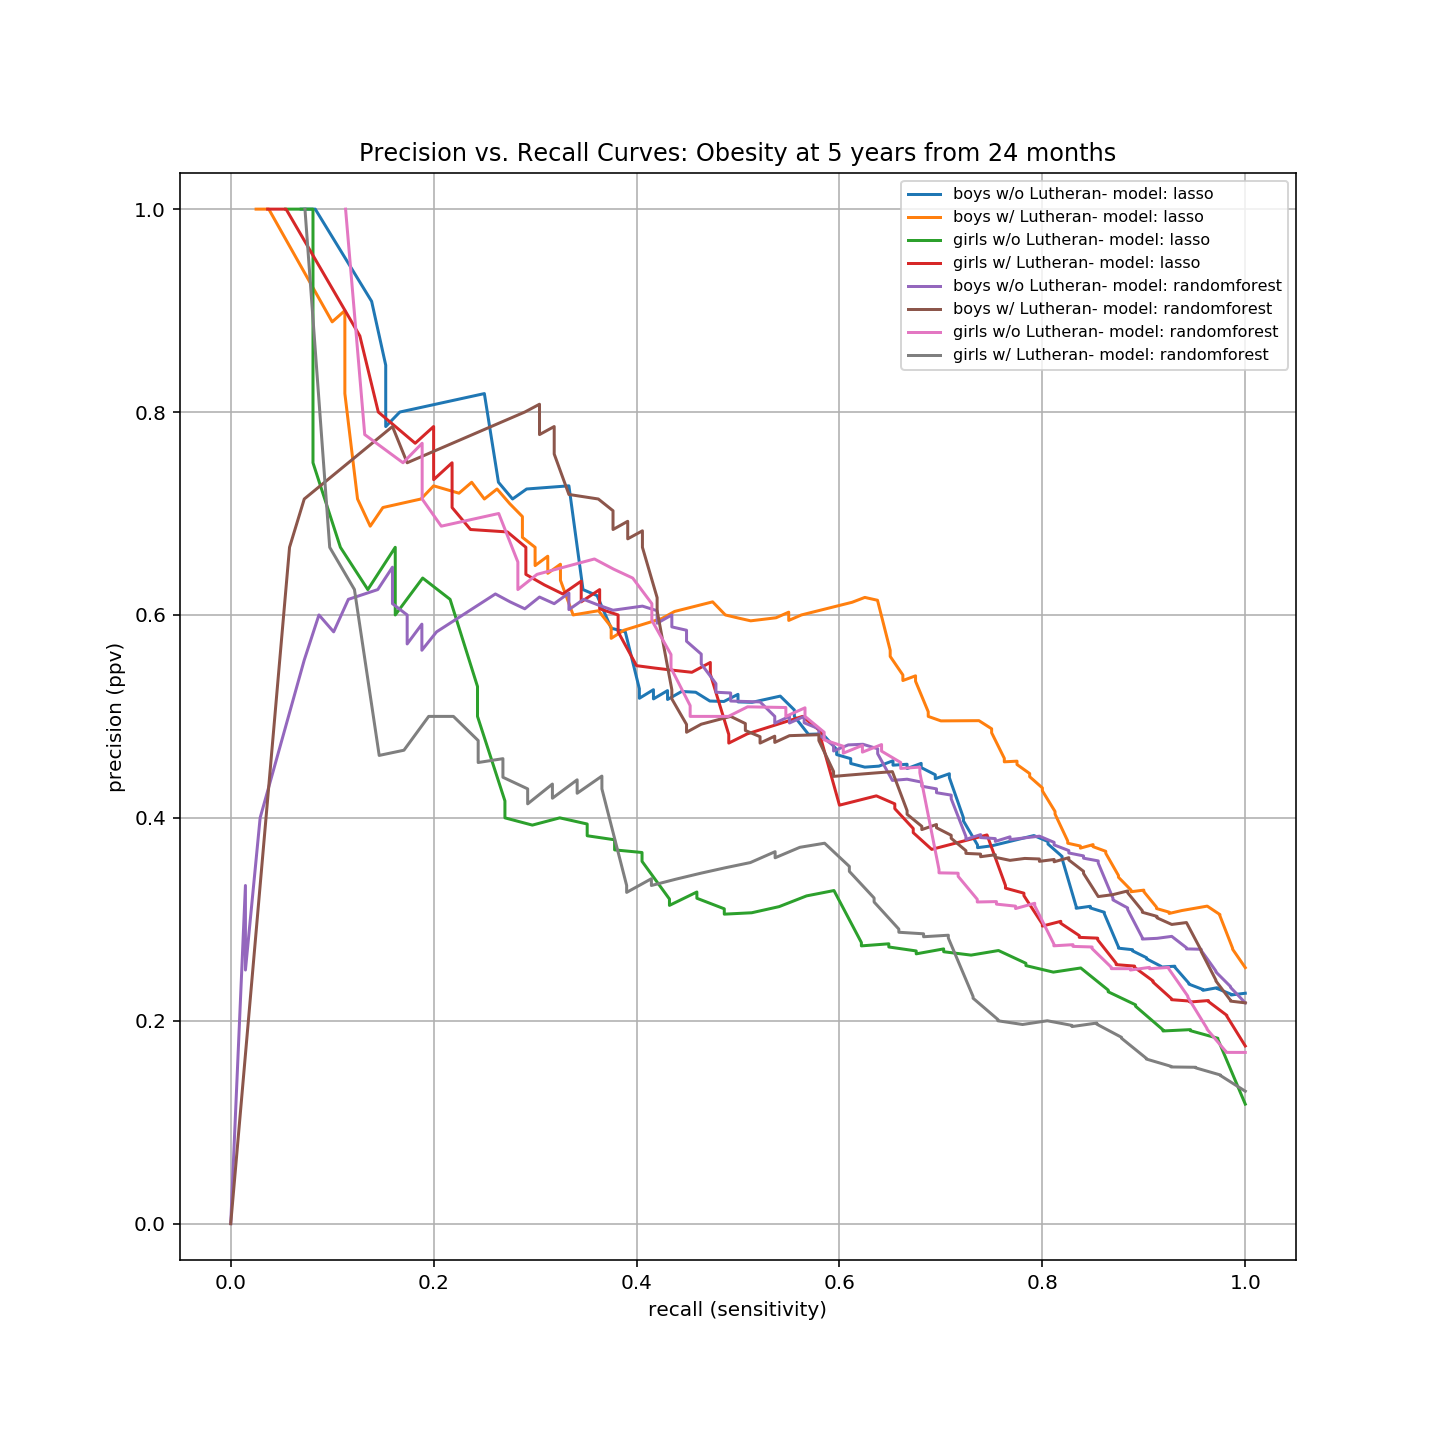

ROC curve:


<IPython.core.display.Javascript object>


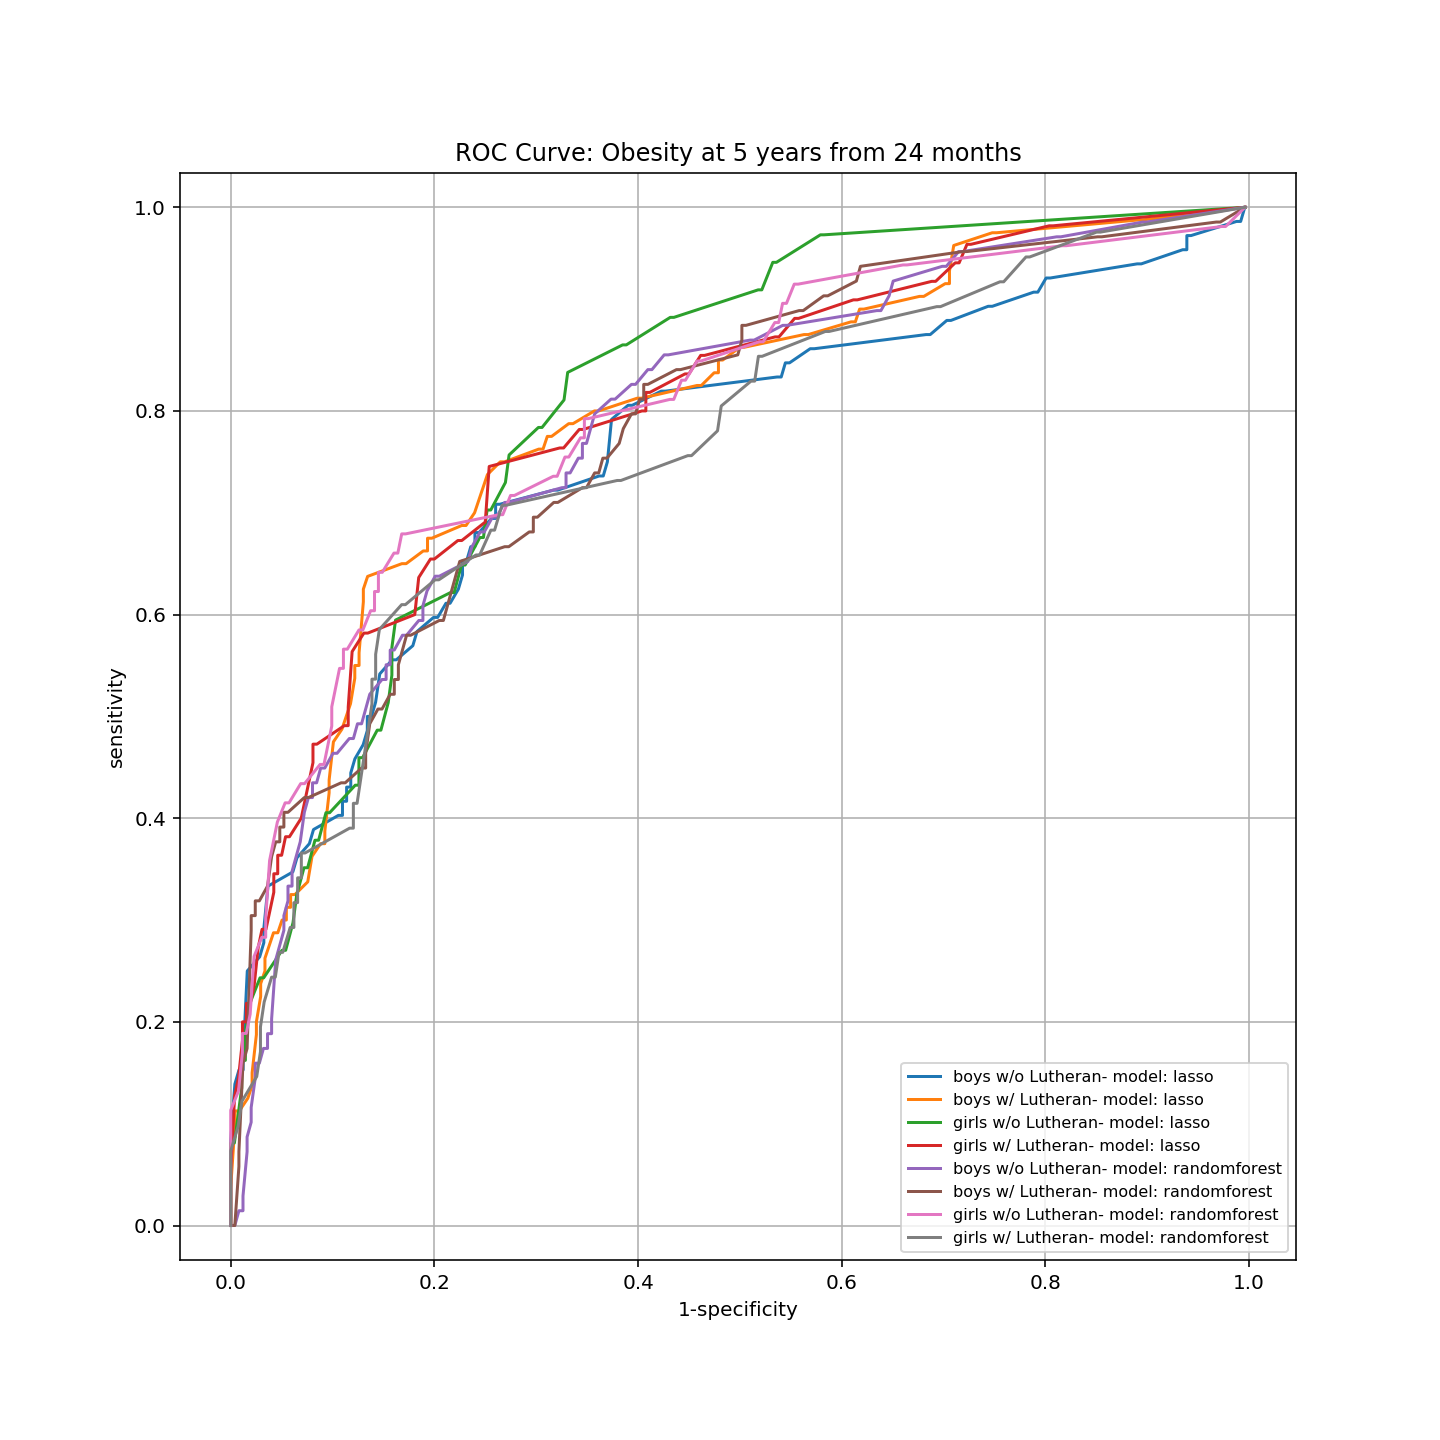

In [74]:
print(len(prec_total))
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

print('precision vs recall curve:')
plt.figure(figsize=(10,10))
for ix in range(len(prec_total)):
    plt.plot(recall_total[ix], prec_total[ix], label=titles_total[ix])
plt.xlabel('recall (sensitivity)')
plt.ylabel('precision (ppv)')
plt.legend(fontsize = 8)
plt.axis('equal')
plt.title('Precision vs. Recall Curves: Obesity at 5 years from 24 months')
plt.grid()
plt.show()

print('ROC curve:')
plt.figure(figsize=(10,10))
for ix in range(len(prec_total)):
    plt.plot(1- np.array(spec_total[ix]), np.array(recall_total[ix]), label=titles_total[ix])
    
plt.legend(fontsize = 8, )
plt.xlabel('1-specificity')
plt.ylabel('sensitivity')
plt.axis('equal')
plt.title('ROC Curve: Obesity at 5 years from 24 months')
plt.grid();
plt.show()

In [13]:
# ORIGINAL
aucs = [['',.788,.772,.804],
       ['',.796,.805,.800],
       ['',.805,.788,.822],
       ['',.800,.784,.815],
       ['',.755,.738,.773],
       ['',.781,.767,.794],
       ['',.825,.813,.837],
       ['',.832,.822,.843]]
for ix, name in enumerate(titles_total):
    aucs[ix][0] = name
    print(aucs[ix])
    
# RERUN
# auc_list = [['', 0.778, 0.763, 0.793],
#         ['', 0.803, 0.785, 0.821],
#         ['', 0.826, 0.809, 0.843],
#         ['', 0.823, 0.801, 0.845],
#         ['', 0.770, 0.751, 0.790],
#         ['', 0.778, 0.763, 0.793],
#         ['', 0.803, 0.785, 0.821],
#         ['', 0.827, 0.808, 0.847]]
# for ix, name in enumerate(titles_total):
#     auc_list[ix][0] = name
#     print(aucs[ix])

['boys w/o Lutheran- model: lasso', 0.788, 0.772, 0.804]
['boys w/ Lutheran- model: lasso', 0.796, 0.805, 0.8]
['girls w/o Lutheran- model: lasso', 0.805, 0.788, 0.822]
['girls w/ Lutheran- model: lasso', 0.8, 0.784, 0.815]
['boys w/o Lutheran- model: randomforest', 0.755, 0.738, 0.773]
['boys w/ Lutheran- model: randomforest', 0.781, 0.767, 0.794]
['girls w/o Lutheran- model: randomforest', 0.825, 0.813, 0.837]
['girls w/ Lutheran- model: randomforest', 0.832, 0.822, 0.843]


precision vs recall curve:


<IPython.core.display.Javascript object>


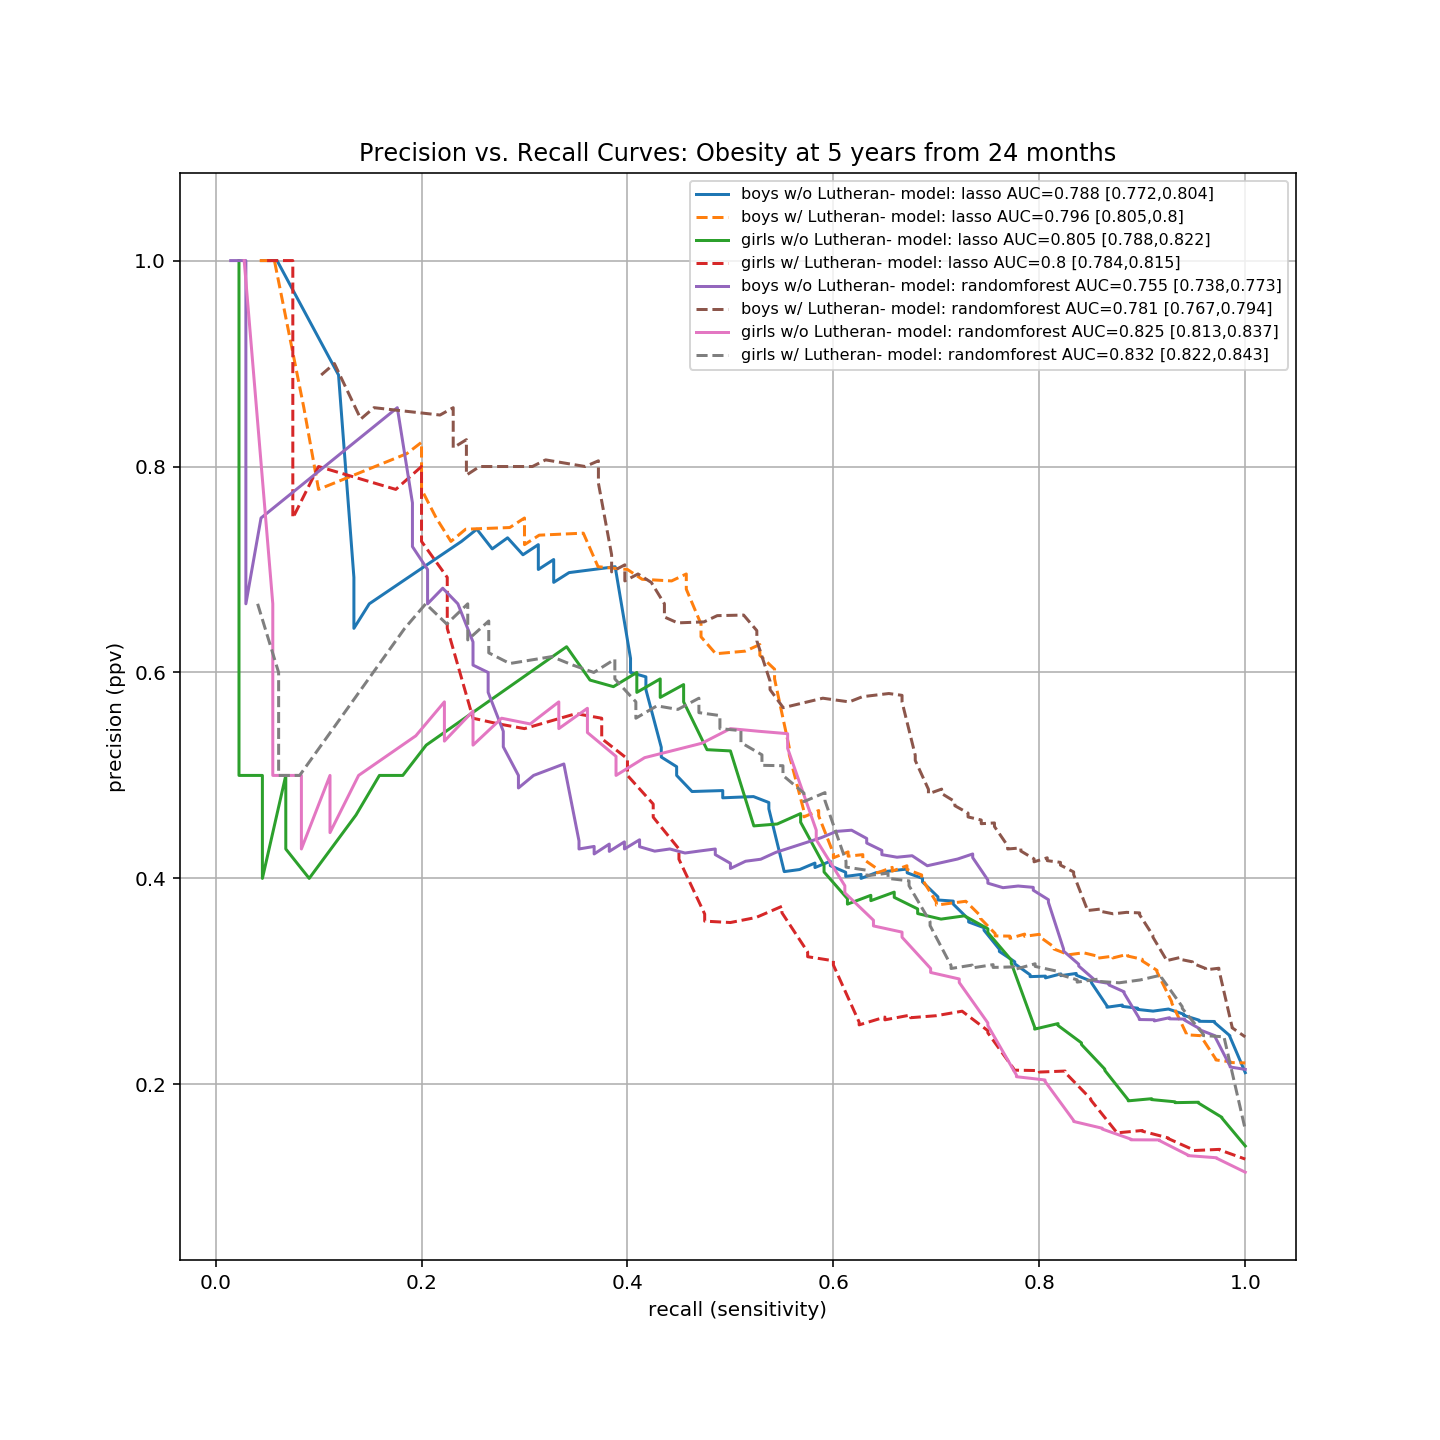

In [19]:
print('precision vs recall curve:')
plt.figure(figsize=(10,10))
for ix in range(len(prec_total)):
    if 'w/ Lutheran' in aucs[ix][0]:
        plt.plot(recall_total[ix], prec_total[ix], '--', label=aucs[ix][0] +' AUC=' + str(aucs[ix][1]) + ' ['+str(aucs[ix][2])+','+str(aucs[ix][3])+']')
    else:
        plt.plot(recall_total[ix], prec_total[ix], '-', label=aucs[ix][0] +' AUC=' + str(aucs[ix][1]) + ' ['+str(aucs[ix][2])+','+str(aucs[ix][3])+']')
plt.xlabel('recall (sensitivity)')
plt.ylabel('precision (ppv)')
plt.legend(fontsize = 8)
plt.axis('equal')
plt.title('Precision vs. Recall Curves: Obesity at 5 years from 24 months')
plt.grid()
# plt.savefig('PrecisionRecall.png')
plt.show()

ROC curve:


<IPython.core.display.Javascript object>


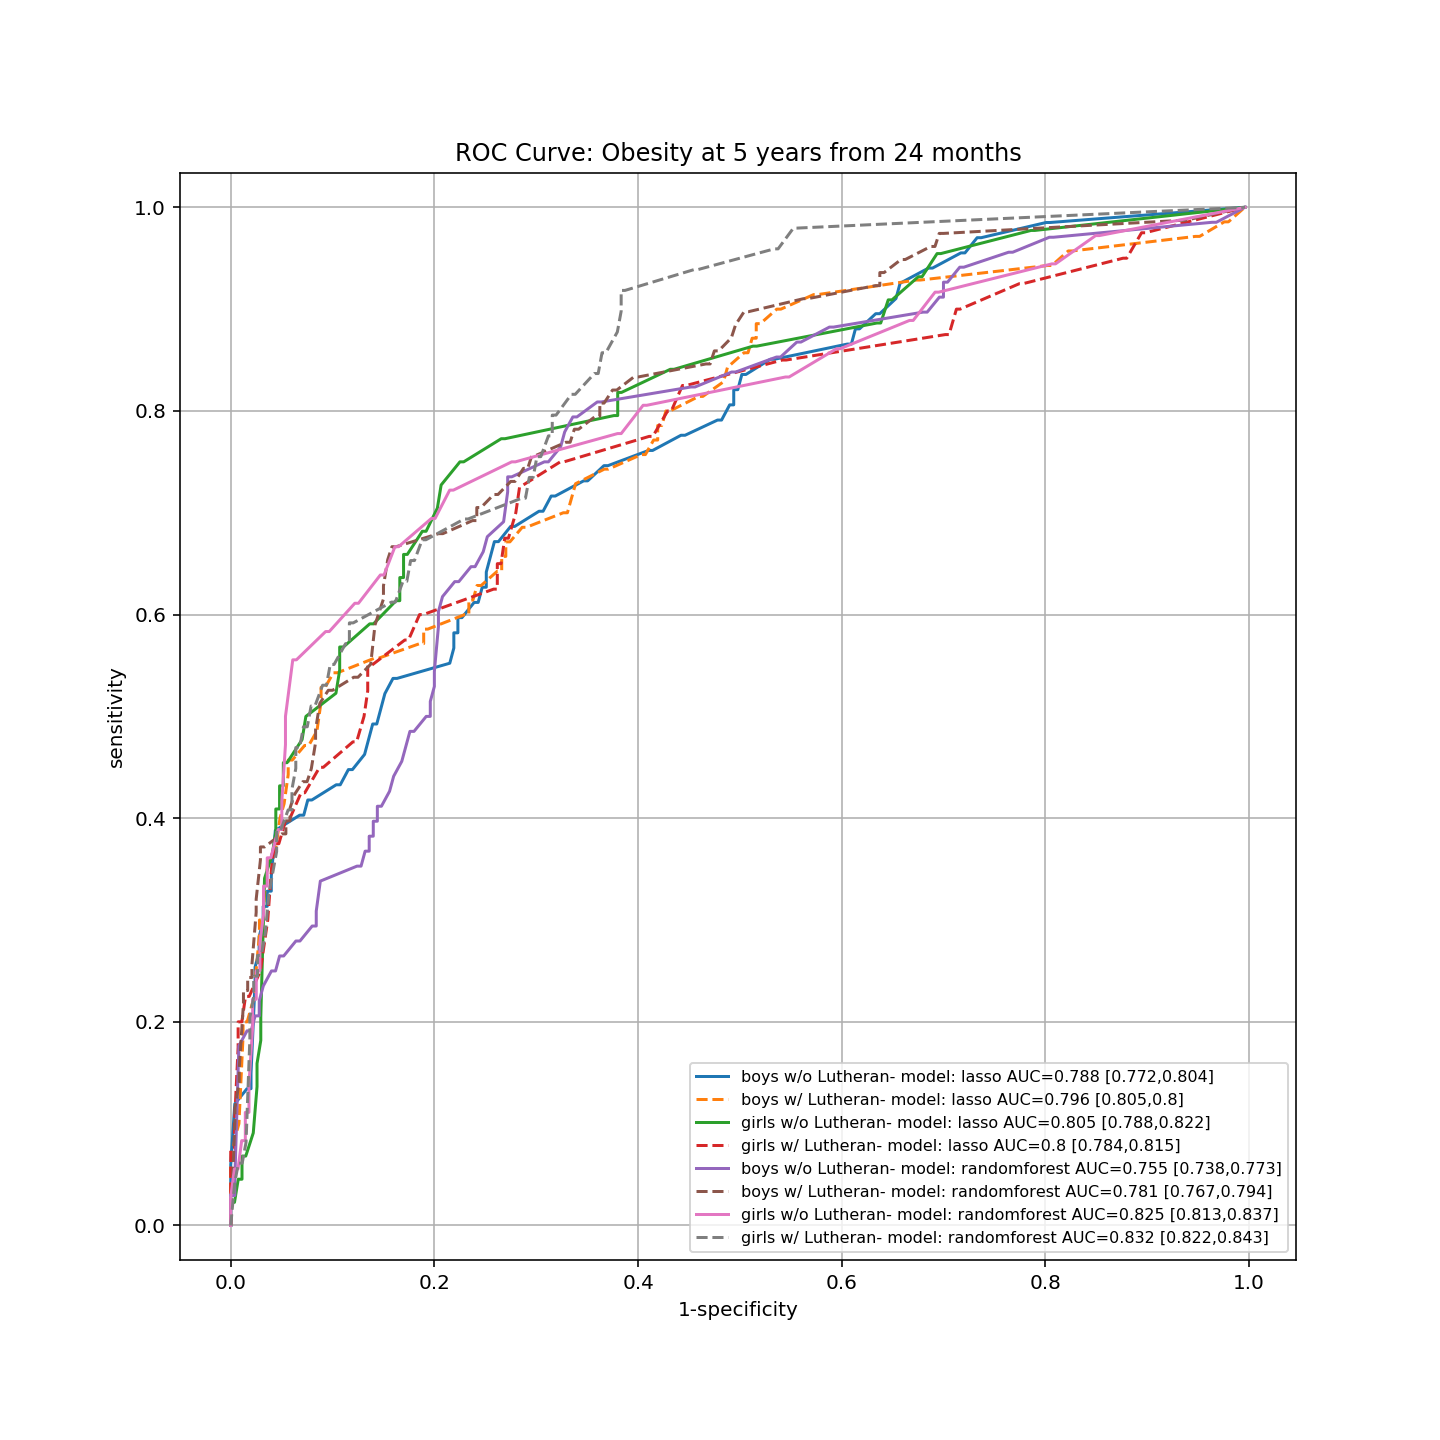

In [20]:

print('ROC curve:')
plt.figure(figsize=(10,10))
for ix in range(len(prec_total)):
    if 'w/ Lutheran' in aucs[ix][0]:
        plt.plot(1- np.array(spec_total[ix]), np.array(recall_total[ix]), '--', label=aucs[ix][0] +' AUC=' + str(aucs[ix][1]) + ' ['+str(aucs[ix][2])+','+str(aucs[ix][3])+']')
    else:
        plt.plot(1- np.array(spec_total[ix]), np.array(recall_total[ix]), '-', label=aucs[ix][0] +' AUC=' + str(aucs[ix][1]) + ' ['+str(aucs[ix][2])+','+str(aucs[ix][3])+']')
    
plt.legend(fontsize = 8, )
plt.xlabel('1-specificity')
plt.ylabel('sensitivity')
plt.axis('equal')
plt.title('ROC Curve: Obesity at 5 years from 24 months')
plt.grid();
# plt.savefig('ROC.png')
plt.show()

In [35]:
for ix, model in enumerate(model_list):
    try:
        weights = np.array(model.coef_).ravel()
    except:
        weights = np.array(model.feature_importances_).ravel()

    weights_sorted_ix = np.argsort(-1*abs(weights))
    for i in weights_sorted_ix[:5]:
        print(aucs[ix][0], ' - feature', feature_headers[i], ' with weight/importance %.3f' % (weights[i]))
    print('\n---------------------------------------\n')

boys w/o Lutheran- model: lasso  - feature Vital: Wt-avg19to24  with weight/importance 0.361
boys w/o Lutheran- model: lasso  - feature Vital: Ht-avg19to24  with weight/importance -0.210
boys w/o Lutheran- model: lasso  - feature Maternal Diagnosis:9ccs10:Immuniz/scrn  with weight/importance 0.179
boys w/o Lutheran- model: lasso  - feature Vital: Wt-latest  with weight/importance 0.153
boys w/o Lutheran- model: lasso  - feature Diagnosis:9ccs0:No DX  with weight/importance 0.145

---------------------------------------

boys w/ Lutheran- model: lasso  - feature Vital: BMI-latest  with weight/importance 0.517
boys w/ Lutheran- model: lasso  - feature Maternal Diagnosis:9ccs183:HTN in preg  with weight/importance 0.209
boys w/ Lutheran- model: lasso  - feature Vital: Wt-avg19to24  with weight/importance 0.208
boys w/ Lutheran- model: lasso  - feature Maternal Diagnosis:9ccs186:DM in preg  with weight/importance 0.182
boys w/ Lutheran- model: lasso  - feature Maternal Procedure History:99

In [45]:
with open('model weights.txt', 'w') as f:
    for ix, model in enumerate(model_list):
        try:
            weights = np.array(model.coef_).ravel()
        except:
            weights = np.array(model.feature_importances_).ravel()

        weights_sorted_ix = np.argsort(-1*abs(weights))
        for i in weights_sorted_ix:
            if weights[i] != 0:
                print(aucs[ix][0], '-', feature_headers[i], ' with weight/importance: ',weights[i],'\n', file=f)
        print('\n---------------------------------------\n', file=f)


# for ix, model in enumerate(model_list):
#     try:
#         weights = np.array(model.coef_).ravel()
#     except:
#         weights = np.array(model.feature_importances_).ravel()

#     weights_sorted_ix = np.argsort(-1*abs(weights))
#     with open(aucs[ix][0]+'.txt', 'w') as f:
#         for i in weights_sorted_ix:
#             print(feature_headers[i], '\t weights[i]\n', file=f)


In [46]:
pickle.dump(prec_total, open('precion.pkl', 'wb'))
pickle.dump(recall_total, open('recall.pkl', 'wb'))
pickle.dump(spec_total, open('specificity.pkl', 'wb'))
pickle.dump(titles_total, open('titles.pkl', 'wb'))
pickle.dump(model_list, open('models.pkl', 'wb'))
pickle.dump(aucs, open('aucs.pkl', 'wb'))

In [75]:
pickle.dump(feature_headers, open('feature_headers.pkl', 'wb'))

In [102]:
girls_df = pd.DataFrame(np.hstack((np.vstack((xtrain_girls,xtest_girls)), np.vstack((ytrainlabel_girls.reshape(-1,1),ytestlabel_girls.reshape(-1,1))), np.vstack((ytrain_girls.reshape(-1,1),ytest_girls.reshape(-1,1))))), columns=feature_headers+['y','y_label'])
boys_df = pd.DataFrame(np.hstack((np.vstack((xtrain_boys,xtest_boys)), np.vstack((ytrainlabel_boys.reshape(-1,1),ytestlabel_boys.reshape(-1,1))), np.vstack((ytrain_boys.reshape(-1,1),ytest_boys.reshape(-1,1))))), columns=feature_headers+['y','y_label'])

In [103]:
girls_lutheran_df = pd.DataFrame(np.hstack((np.vstack((xtrain_lutheran_girls,xtest_lutheran_girls)), np.vstack((ytrainlabel_lutheran_girls.reshape(-1,1),ytestlabel_lutheran_girls.reshape(-1,1))), np.vstack((ytrain_lutheran_girls.reshape(-1,1),ytest_lutheran_girls.reshape(-1,1))))), columns=feature_headers+['y','y_label'])
boys_lutheran_df = pd.DataFrame(np.hstack((np.vstack((xtrain_lutheran_boys,xtest_lutheran_boys)), np.vstack((ytrainlabel_lutheran_boys.reshape(-1,1),ytestlabel_lutheran_boys.reshape(-1,1))), np.vstack((ytrain_lutheran_boys.reshape(-1,1),ytest_lutheran_boys.reshape(-1,1))))), columns=feature_headers+['y','y_label'])

In [104]:
pickle.dump(girls_df, open('girls_df.pkl', 'wb'))
pickle.dump(girls_lutheran_df, open('girls_lutheran_df.pkl', 'wb'))
pickle.dump(boys_df, open('boys_df.pkl', 'wb'))
pickle.dump(boys_lutheran_df, open('boys_lutheran_df.pkl', 'wb'))